In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import matplotlib as p
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import average_precision_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/empolyment-kenya/empoly_kenya.csv
/kaggle/input/train-data/train_credit.csv
/kaggle/input/description/VariableDefinitions.txt
/kaggle/input/test-data/test_credit.csv
/kaggle/input/empolyment-ghana/empoly_ghana.csv
/kaggle/input/ghana-gdp/realGdp_ghana.csv
/kaggle/input/extra-features/economic_indicators.csv
/kaggle/input/kenya-gdp/RealGdp_kenya.csv
/kaggle/input/sample-submit/SampleSubmission.csv


In [3]:
sample_path='/kaggle/input/sample-submit/SampleSubmission.csv'
extra_features_path='/kaggle/input/extra-features/economic_indicators.csv'
test_path='/kaggle/input/test-data/test_credit.csv'
train_path='/kaggle/input/train-data/train_credit.csv'
desc_path='/kaggle/input/description/VariableDefinitions.txt'
empoly_to_pop_ghanapath='/kaggle/input/empolyment-ghana/empoly_ghana.csv'
empoly_to_pop_kenyapath='/kaggle/input/empolyment-kenya/empoly_kenya.csv'
gdp_kenya='/kaggle/input/kenya-gdp/RealGdp_kenya.csv'
gdp_ghana='/kaggle/input/ghana-gdp/realGdp_ghana.csv'



# *Examinig Main data*

In [4]:
with open(desc_path,'r') as file:
    print(file.read())

## Description of variables in Train/Test.csv

0. **ID**: A unique identifier for each entry in the dataset.

1. **customer_id**: Unique identifier for each customer in the dataset.

2. **country_id**: Identifier or code representing the country where the customer resides or where the loan was issued.

3. **tbl_loan_id**: Unique identifier for each loan associated with the customer.

4. **Total_Amount**: The total loan amount initially disbursed to the customer.

5. **Total_Amount_to_Repay**: The total amount the customer is expected to repay, including principal, interest, and fees.

6. **loan_type**: The category or type of loan.

7. **disbursement_date**: The date when the loan amount was disbursed to the customer.

8. **duration**: The length of the loan term, typically expressed in days

9. **lender_id**: Unique identifier for the lender or institution that issued the loan.

10. **New_versus_Repeat**: Indicates whether the loan is the customer's first loan ("New") or if the custom

In [5]:
train_data=pd.read_csv(train_path)
extra_feature_data=pd.read_csv(extra_features_path)
train_data.head(10)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
5,ID_265607284433267278,265607,Kenya,284433,267278,Type_1,4325.0,4325.0,2022-10-19,2022-10-26,7,Repeat Loan,1297.50,0.300000,1298.0,0
6,ID_261844305920267278,261844,Kenya,305920,267278,Type_1,6735.0,6735.0,2022-11-29,2022-12-06,7,Repeat Loan,2020.50,0.300000,2021.0,0
7,ID_265488287698267278,265488,Kenya,287698,267278,Type_1,1540.0,1562.0,2022-10-25,2022-11-01,7,Repeat Loan,462.00,0.300000,469.0,0
8,ID_268010279432267278,268010,Kenya,279432,267278,Type_1,21496.0,21994.0,2022-10-11,2022-10-18,7,Repeat Loan,0.00,0.000000,0.0,0
9,ID_245399236898267278,245399,Kenya,236898,267278,Type_1,18852.0,18852.0,2022-08-15,2022-08-22,7,Repeat Loan,5655.60,0.300000,5656.0,0


In [6]:
test_data=pd.read_csv(test_path)
test_data.head(10)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0
5,ID_271847294122267278,271847,Kenya,294122,267278,Type_1,3438.0,3471.0,2022-11-05,2022-11-12,7,Repeat Loan,1031.4,0.300000,1041.0
6,ID_308399367770267278,308399,Kenya,367770,267278,Type_7,5000.0,5181.0,2024-07-17,2024-07-24,7,Repeat Loan,1000.0,0.200000,1036.0
7,ID_253278278418267278,253278,Kenya,278418,267278,Type_1,3917.0,3917.0,2022-10-10,2022-10-17,7,Repeat Loan,117.0,0.029870,117.0
8,ID_256877248892267278,256877,Kenya,248892,267278,Type_1,4799.0,4799.0,2022-08-31,2022-09-07,7,Repeat Loan,0.0,0.000000,0.0
9,ID_262156246268267278,262156,Kenya,246268,267278,Type_1,5708.0,5885.0,2022-08-27,2022-09-03,7,Repeat Loan,120.0,0.021023,124.0


In [7]:
sample_data=pd.read_csv(sample_path)
sample_data.head(10)

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0
5,ID_271847294122267278,0
6,ID_308399367770267278,0
7,ID_253278278418267278,0
8,ID_256877248892267278,0
9,ID_262156246268267278,0


In [8]:
print(np.unique(test_data['country_id']))

['Ghana' 'Kenya']


In [9]:
for i in test_data.columns:
    if len(np.unique(test_data[i]))>=50:
        continue
    print(f'{i}----{np.unique(test_data[i])}')

country_id----['Ghana' 'Kenya']
lender_id----[245684 251804 267277 267278 296540 296542 297182 297183]
loan_type----['Type_1' 'Type_10' 'Type_11' 'Type_12' 'Type_13' 'Type_14' 'Type_15'
 'Type_17' 'Type_18' 'Type_2' 'Type_20' 'Type_21' 'Type_22' 'Type_23'
 'Type_24' 'Type_3' 'Type_4' 'Type_5' 'Type_6' 'Type_7' 'Type_8' 'Type_9']
New_versus_Repeat----['New Loan' 'Repeat Loan']


In [10]:
for i in train_data.columns:
    if len(np.unique(train_data[i]))>=50:
        continue
    print(f'{i}----{np.unique(train_data[i])}')

country_id----['Kenya']
lender_id----[245684 251804 267277 267278]
loan_type----['Type_1' 'Type_10' 'Type_11' 'Type_12' 'Type_13' 'Type_14' 'Type_15'
 'Type_16' 'Type_17' 'Type_18' 'Type_19' 'Type_2' 'Type_20' 'Type_21'
 'Type_22' 'Type_23' 'Type_24' 'Type_4' 'Type_5' 'Type_6' 'Type_7'
 'Type_9']
New_versus_Repeat----['New Loan' 'Repeat Loan']
target----[0 1]


In [11]:
np.unique(train_data[train_data.target==1]['disbursement_date'])

array(['2021-11-18', '2021-11-23', '2021-11-24', '2021-11-30',
       '2021-12-02', '2021-12-03', '2022-01-05', '2022-01-13',
       '2022-01-28', '2022-01-31', '2022-02-02', '2022-02-04',
       '2022-02-05', '2022-02-08', '2022-02-11', '2022-02-15',
       '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-21',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
       '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
       '2022-03-04', '2022-03-05', '2022-03-07', '2022-03-08',
       '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-14',
       '2022-03-16', '2022-03-18', '2022-03-19', '2022-03-21',
       '2022-03-22', '2022-03-23', '2022-03-28', '2022-03-29',
       '2022-03-30', '2022-03-31', '2022-04-02', '2022-04-03',
       '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-11',
       '2022-04-12', '2022-04-13', '2022-04-16', '2022-04-18',
       '2022-04-19', '2022-04-21', '2022-04-22', '2022-04-25',
       '2022-04-26', '2022-04-30', '2022-05-04', '2022-

In [12]:
my_extra_info=[empoly_to_pop_ghanapath,empoly_to_pop_kenyapath,gdp_ghana,gdp_kenya]

In [13]:
my_extra_info_df=pd.concat([pd.read_csv(file) for file in my_extra_info],ignore_index=True,axis=1)

In [14]:
my_extra_info_df.tail(20)

,0,1,2,3,4,5,6,7
13,1/1/2004,68.293,1/1/2004,70.867,1/1/2013,7.242092,1/1/2013,3.797844
14,1/1/2005,68.655,1/1/2005,71.098,1/1/2014,2.856240,1/1/2014,5.020121
15,1/1/2006,68.987,1/1/2006,71.286,1/1/2015,2.120759,1/1/2015,4.967720
16,1/1/2007,68.490,1/1/2007,71.435,1/1/2016,3.373466,1/1/2016,4.213509
17,1/1/2008,68.135,1/1/2008,71.436,1/1/2017,8.128895,1/1/2017,3.815511
18,1/1/2009,67.624,1/1/2009,71.481,1/1/2018,6.200078,1/1/2018,5.670796
19,1/1/2010,67.280,1/1/2010,71.622,1/1/2019,6.507775,1/1/2019,5.114159
20,1/1/2011,67.775,1/1/2011,71.839,1/1/2020,0.513942,1/1/2020,-0.272755
21,1/1/2012,68.189,1/1/2012,71.978,1/1/2021,5.076466,1/1/2021,7.590477
22,1/1/2013,68.481,1/1/2013,72.003,1/1/2022,3.817505,1/1/2022,4.859981


In [15]:
my_extra_info_df=my_extra_info_df.iloc[:,1:4]
my_extra_info_df

,1,2,3
0,74.834,1/1/1991,71.183
1,73.597,1/1/1992,70.938
2,72.893,1/1/1993,70.708
3,72.064,1/1/1994,70.597
4,71.315,1/1/1995,70.584
5,70.545,1/1/1996,70.563
6,69.832,1/1/1997,70.438
7,69.109,1/1/1998,70.345
8,67.378,1/1/1999,70.225
9,66.806,1/1/2000,70.345


In [16]:
my_extra_info_df[2]=[int(value[-4:]) for value in my_extra_info_df[2]]
my_extra_info_df

,1,2,3
0,74.834,1991,71.183
1,73.597,1992,70.938
2,72.893,1993,70.708
3,72.064,1994,70.597
4,71.315,1995,70.584
5,70.545,1996,70.563
6,69.832,1997,70.438
7,69.109,1998,70.345
8,67.378,1999,70.225
9,66.806,2000,70.345


In [17]:
my_extra_info_df.set_index(2,inplace=True)
my_extra_info_df

,1,3
2,,
1991,74.834,71.183
1992,73.597,70.938
1993,72.893,70.708
1994,72.064,70.597
1995,71.315,70.584
1996,70.545,70.563
1997,69.832,70.438
1998,69.109,70.345
1999,67.378,70.225


In [18]:
my_extra_info_df.rename(columns={1:'ghana',3:'kenya'},inplace=True)

In [19]:
my_extra_info_df

,ghana,kenya
2,,
1991,74.834,71.183
1992,73.597,70.938
1993,72.893,70.708
1994,72.064,70.597
1995,71.315,70.584
1996,70.545,70.563
1997,69.832,70.438
1998,69.109,70.345
1999,67.378,70.225


In [20]:
my_extra_info_df.loc[2024, 'ghana':'kenya'] = [np.nan,np.nan]
my_extra_info_df.loc[2025, 'ghana':'kenya'] = [np.nan, np.nan]

In [21]:
my_extra_info_df

,ghana,kenya
2,,
1991,74.834,71.183
1992,73.597,70.938
1993,72.893,70.708
1994,72.064,70.597
1995,71.315,70.584
1996,70.545,70.563
1997,69.832,70.438
1998,69.109,70.345
1999,67.378,70.225


In [22]:
my_extra_info_df=my_extra_info_df.loc[:,:].interpolate(method='linear',axis=0,limit_direction='both')
my_extra_info_df

,ghana,kenya
2,,
1991,74.834,71.183
1992,73.597,70.938
1993,72.893,70.708
1994,72.064,70.597
1995,71.315,70.584
1996,70.545,70.563
1997,69.832,70.438
1998,69.109,70.345
1999,67.378,70.225


In [23]:
train_data['disbursement_date'] = pd.to_datetime(train_data['disbursement_date'])
train_data['due_date'] = pd.to_datetime(train_data['due_date'],errors='coerce')
print(train_data['disbursement_date'].dtype)
print(train_data['due_date'].dtype)

datetime64[ns]
datetime64[ns]


In [24]:
train_data['due_date'].isna().sum()

0

In [25]:
maxium = train_data['disbursement_date'].dt.year.max()
minium=train_data['disbursement_date'].dt.year.min()
maxium1 = train_data['due_date'].dt.year.max()
minium1=train_data['due_date'].dt.year.min()

print(maxium,minium)
print(maxium1,minium1)

2024 2021
2025 2021


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  int64         
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  int64         
 4   lender_id                    68654 non-null  int64         
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

In [27]:
train_data.duplicated().sum()

0

In [28]:
train_data.isna().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [29]:
train_data.shape

(68654, 16)

In [30]:
print(np.unique(train_data['duration']))
print(np.unique(train_data['country_id']))
print(len(np.unique(train_data['customer_id'])))
print(len(np.unique(train_data['lender_id'])))
train_data.drop(columns=['tbl_loan_id','ID'],inplace=True)

[   1    2    3    4    5    7    8    9   12   14   15   16   17   18
   20   21   22   23   24   25   26   27   28   29   30   31   32   36
   40   42   43   44   45   57   59   60   61   62   87   90   91   92
  120  121  122  150  152  153  180  182  183  240  243  270  273  300
  334  360  365  366  548  905  912 1096]
['Kenya']
6540
4


# *Examining extra data*

In [31]:
np.unique(extra_feature_data['Indicator'])

array(['Average precipitation in depth (mm per year)',
       'Deposit interest rate (%)',
       'Fossil fuel energy consumption (% of total)',
       'Inflation, consumer prices (annual %)',
       'Interest rate spread (lending rate minus deposit rate, %)',
       'Lending interest rate (%)',
       'Official exchange rate (LCU per US$, period average)',
       'Real interest rate (%)', 'Unemployment rate'], dtype=object)

In [32]:
extra_feature_data.head(10)

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
6,Ghana,Real interest rate (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cote d'Ivoire,Real interest rate (%),NaN,NaN,NaN,NaN,5.763991,3.331831,1.613290,-0.368944,...,0.891701,0.361233,6.552137,6.246748,NaN,NaN,NaN,NaN,NaN,NaN
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
9,Ghana,Average precipitation in depth (mm per year),1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,NaN,NaN


In [33]:
group_extra=extra_feature_data.groupby(['Country','Indicator'])[['YR2020','YR2021','YR2022','YR2023']].mean()
group_extra

YR2020  \
Country       Indicator                                                         
Cote d'Ivoire Average precipitation in depth (mm per year)        1348.000000   
              Deposit interest rate (%)                                   NaN   
              Fossil fuel energy consumption (% of total)                 NaN   
              Inflation, consumer prices (annual %)                  2.425007   
              Interest rate spread (lending rate minus deposi...          NaN   
              Lending interest rate (%)                                   NaN   
              Official exchange rate (LCU per US$, period ave...   575.586005   
              Real interest rate (%)                                      NaN   
              Unemployment rate                                      2.559000   
Ghana         Average precipitation in depth (mm per year)        1187.000000   
              Deposit interest rate (%)                             11.500000   
              Fossil fuel energy consumption (% of total)                 NaN   
              Inflation, consumer prices (annual %)                  9.887290   
              Interest rate spread (lending rate minus deposi...          NaN   
              Lending interest rate (%)                                   NaN   
              Official exchange rate (LCU per US$, period ave...     5.595708   
              Real interest rate (%)                                      NaN   
              Unemployment rate                                      3.285000   
Kenya         Average precipitation in depth (mm per year)         630.000000   
              Deposit interest rate (%)                              6.968703   
              Fossil fuel energy consumption (% of total)                 NaN   
              Inflation, consumer prices (annual %)                  5.405162   
              Interest rate spread (lending rate minus deposi...     5.027081   
              Lending interest rate (%)                             11.995785   
              Official exchange rate (LCU per US$, period ave...   106.450780   
              Real interest rate (%)                                 6.714634   
              Unemployment rate                                      5.621000   

                                                                       YR2021  \
Country       Indicator                                                         
Cote d'Ivoire Average precipitation in depth (mm per year)        1348.000000   
              Deposit interest rate (%)                                   NaN   
              Fossil fuel energy consumption (% of total)                 NaN   
              Inflation, consumer prices (annual %)                  4.091952   
              Interest rate spread (lending rate minus deposi...          NaN   
              Lending interest rate (%)                                   NaN   
              Official exchange rate (LCU per US$, period ave...   554.530675   
              Real interest rate (%)                                      NaN   
              Unemployment rate                                      2.590000   
Ghana         Average precipitation in depth (mm per year)        1187.000000   
              Deposit interest rate (%)                             11.500000   
              Fossil fuel energy consumption (% of total)                 NaN   
              Inflation, consumer prices (annual %)                  9.971089   
              Interest rate spread (lending rate minus deposi...          NaN   
              Lending interest rate (%)                                   NaN   
              Official exchange rate (LCU per US$, period ave...     5.805700   
              Real interest rate (%)                                      NaN   
              Unemployment rate                                      3.338000   
Kenya         Average precipitation in depth (mm per year)         630.000000   
              Deposi

In [34]:
extra_data=extra_feature_data[extra_feature_data['Country'].isin(['Kenya'])].iloc[:,0:]
extra_data

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
11,Kenya,Average precipitation in depth (mm per year),630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,NaN,NaN
14,Kenya,Deposit interest rate (%),6.639167,5.486667,4.133333,2.433333,5.082500,5.138703,5.162251,5.302131,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
17,Kenya,Lending interest rate (%),19.665833,18.453333,16.573333,12.531667,12.882500,13.635534,13.340344,14.016939,...,16.513931,16.086614,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502
20,Kenya,Interest rate spread (lending rate minus depos...,13.026667,12.966667,12.440000,10.098333,7.800000,8.496831,8.178093,8.714809,...,8.140551,6.897669,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812
23,Kenya,Fossil fuel energy consumption (% of total),16.421786,15.676951,12.999011,14.099024,15.438744,17.065264,16.643511,16.964666,...,17.379573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Kenya,Unemployment rate,2.868000,2.903000,2.860000,2.836000,2.739000,2.678000,2.650000,2.752000,...,2.768000,2.763000,2.757000,3.540000,4.284000,5.014000,5.621000,5.693000,5.805000,5.682000


****[https://www.bog.gov.gh/economic-data/interest-rates/](http://)****
****Link For Ghana Dataset(Deposit Rate, Lending Rate, Saving Rate, Policy Rate, Refrence Rate)****

1. ****Real Interest Rate= Reference Rate - Inflation Rate****
2. ****Interest Rate Spread = Lending Rate - Deposit Rate****

In [35]:
import numpy as np

In [36]:
#Reference Rate For Ghana From 2021-2025
ghana_ref_rate=[13.955,21.72083,23.720830,25.720830,27.720830]
ghana_lend_rate=[20.60833, 26.22833, 28.851163, 31.736279, 34.909907]
ghana_dep_rate=[11.500000, 12.052083, 11.416667,12.558334,13.814167]
ghana_inflate_rate=[9.971089, 31.255895, 38.106966,41.917663,46.109429]
ghana_real_interest_rate=np.array(ghana_ref_rate)-np.array(ghana_inflate_rate)
ghana_intreset_spread=np.array(ghana_lend_rate)-np.array(ghana_dep_rate)


In [37]:
ghana_real_interest_rate=np.abs(ghana_real_interest_rate)
ghana_intreset_spread=np.abs(ghana_intreset_spread)

In [38]:
extra_data.dropna(axis=0,inplace=True)
extra_data

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
14,Kenya,Deposit interest rate (%),6.639167,5.486667,4.133333,2.433333,5.082500,5.138703,5.162251,5.302131,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
17,Kenya,Lending interest rate (%),19.665833,18.453333,16.573333,12.531667,12.882500,13.635534,13.340344,14.016939,...,16.513931,16.086614,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502
20,Kenya,Interest rate spread (lending rate minus depos...,13.026667,12.966667,12.440000,10.098333,7.800000,8.496831,8.178093,8.714809,...,8.140551,6.897669,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812
26,Kenya,Unemployment rate,2.868000,2.903000,2.860000,2.836000,2.739000,2.678000,2.650000,2.752000,...,2.768000,2.763000,2.757000,3.540000,4.284000,5.014000,5.621000,5.693000,5.805000,5.682000


In [39]:
extra_data["YR2024"] = np.nan
extra_data["YR2025"] = np.nan

In [40]:
extra_data

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024,YR2025
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396,NaN,NaN
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384,NaN,NaN
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517,NaN,NaN
14,Kenya,Deposit interest rate (%),6.639167,5.486667,4.133333,2.433333,5.082500,5.138703,5.162251,5.302131,...,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690,NaN,NaN
17,Kenya,Lending interest rate (%),19.665833,18.453333,16.573333,12.531667,12.882500,13.635534,13.340344,14.016939,...,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502,NaN,NaN
20,Kenya,Interest rate spread (lending rate minus depos...,13.026667,12.966667,12.440000,10.098333,7.800000,8.496831,8.178093,8.714809,...,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812,NaN,NaN
26,Kenya,Unemployment rate,2.868000,2.903000,2.860000,2.836000,2.739000,2.678000,2.650000,2.752000,...,2.757000,3.540000,4.284000,5.014000,5.621000,5.693000,5.805000,5.682000,NaN,NaN


In [41]:
df=extra_data.iloc[:,2:].interpolate(method='linear',axis=1)
df

,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,...,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024,YR2025
2,5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,9.234126,3.961389,...,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396,7.671396,7.671396
5,78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,77.352012,79.233152,...,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384,139.846384,139.846384
8,17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,-10.096004,12.526958,...,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517,6.546517,6.546517
14,6.639167,5.486667,4.133333,2.433333,5.082500,5.138703,5.162251,5.302131,5.967017,4.557367,...,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690,9.167690,9.167690
17,19.665833,18.453333,16.573333,12.531667,12.882500,13.635534,13.340344,14.016939,14.804541,14.371500,...,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502,13.588502,13.588502
20,13.026667,12.966667,12.440000,10.098333,7.800000,8.496831,8.178093,8.714809,8.837524,9.814133,...,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812,4.420812,4.420812
26,2.868000,2.903000,2.860000,2.836000,2.739000,2.678000,2.650000,2.752000,2.813000,2.793000,...,2.757000,3.540000,4.284000,5.014000,5.621000,5.693000,5.805000,5.682000,5.682000,5.682000


In [42]:
df['Indicator']=extra_data['Indicator']

In [43]:
chosen_col=['Indicator','YR2021','YR2022','YR2023','YR2024','YR2025']

In [44]:
df=df[chosen_col]

In [45]:
df

,Indicator,YR2021,YR2022,YR2023,YR2024,YR2025
2,"Inflation, consumer prices (annual %)",6.107936,7.659863,7.671396,7.671396,7.671396
5,"Official exchange rate (LCU per US$, period av...",109.637747,117.865989,139.846384,139.846384,139.846384
8,Real interest rate (%),7.427581,5.968447,6.546517,6.546517,6.546517
14,Deposit interest rate (%),6.686974,7.145176,9.167690,9.167690,9.167690
17,Lending interest rate (%),12.079998,12.335841,13.588502,13.588502,13.588502
20,Interest rate spread (lending rate minus depos...,5.393025,5.190665,4.420812,4.420812,4.420812
26,Unemployment rate,5.693000,5.805000,5.682000,5.682000,5.682000


# *EDA*

**UNIVARATE ANALYSIS**

In [46]:
train_data['target'].value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

Text(0.5, 1.0, 'Imbalance Dataset')

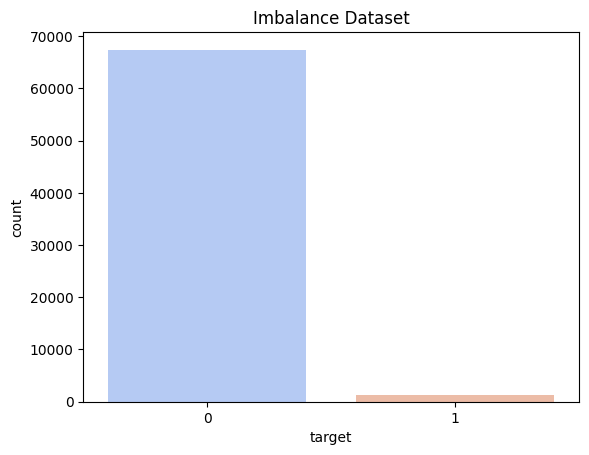

In [47]:
sns.countplot(x='target',data=train_data,palette='coolwarm')
plt.title('Imbalance Dataset')

([<matplotlib.patches.Wedge at 0x7a6f868caef0>,
 [Text(-1.098177898374462, 0.06328746733635372, '0'),
  Text(1.0981778961524362, -0.06328750589341715, '1')],
 [Text(-0.5990061263860701, 0.034520436728920204, '98.2%'),
  Text(0.599006125174056, -0.03452045776004572, '1.8%')])

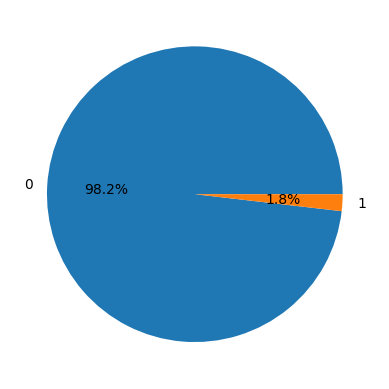

In [48]:
count_class=train_data['target'].value_counts()
plt.pie(labels=[0,1],x=count_class,autopct='%1.1f%%' )

**Bi_variate Analysis**

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  68654 non-null  int64         
 1   country_id                   68654 non-null  object        
 2   lender_id                    68654 non-null  int64         
 3   loan_type                    68654 non-null  object        
 4   Total_Amount                 68654 non-null  float64       
 5   Total_Amount_to_Repay        68654 non-null  float64       
 6   disbursement_date            68654 non-null  datetime64[ns]
 7   due_date                     68654 non-null  datetime64[ns]
 8   duration                     68654 non-null  int64         
 9   New_versus_Repeat            68654 non-null  object        
 10  Amount_Funded_By_Lender      68654 non-null  float64       
 11  Lender_portion_Funded        68654 non-nu

In [50]:
def seperate_features(df):
    cont_var=[]
    cat_var=[]
    for i in df.columns:
        if df[i].dtype=='object' or df[i].dtype=='datetime64[ns]':
            cat_var.append(i)
        else:
            cont_var.append(i)
    return cat_var,cont_var 

In [51]:
cat_var,cont_var=seperate_features(train_data)

In [52]:
#cat_var.remove('due_date')
cat_var

['country_id',
 'loan_type',
 'disbursement_date',
 'due_date',
 'New_versus_Repeat']

In [53]:
train_data['month_due']=train_data['due_date'].dt.month
train_data['year_due']=train_data['due_date'].dt.year
train_data['date_due']=train_data['due_date'].dt.day

In [54]:
train_data['month_intial']=train_data['disbursement_date'].dt.month
train_data['year_intial']=train_data['disbursement_date'].dt.year
train_data['date_intial']=train_data['disbursement_date'].dt.day

In [55]:
train_data['month_due']

0         9
1         8
2         9
3        10
4        12
         ..
68649     8
68650     7
68651     7
68652    11
68653    10
Name: month_due, Length: 68654, dtype: int32

In [56]:
#train_data.drop(columns=['due_date','disbursement_date'],inplace=True)

In [57]:
cat_var,cont_var=seperate_features(train_data)

In [58]:
cat_var

['country_id',
 'loan_type',
 'disbursement_date',
 'due_date',
 'New_versus_Repeat']

In [59]:
len(np.unique(train_data['loan_type']))

22

In [60]:
train_data['year_intial']

0        2022
1        2022
2        2024
3        2022
4        2022
         ... 
68649    2022
68650    2022
68651    2022
68652    2022
68653    2022
Name: year_intial, Length: 68654, dtype: int32

In [61]:
train_data[train_data['year_intial']==2022]

,customer_id,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,month_due,year_due,date_due,month_intial,year_intial,date_intial
0,266671,Kenya,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0,9,2022,6,8,2022,30
1,248919,Kenya,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0,8,2022,6,7,2022,30
3,266004,Kenya,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0,10,2022,27,10,2022,20
4,253803,Kenya,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0,12,2022,5,11,2022,28
5,265607,Kenya,267278,Type_1,4325.0,4325.0,2022-10-19,2022-10-26,7,Repeat Loan,1297.50,0.300000,1298.0,0,10,2022,26,10,2022,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,244559,Kenya,267278,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0,8,2022,6,7,2022,30
68650,260062,Kenya,267278,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0,7,2022,23,7,2022,16
68651,259137,Kenya,267278,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0,7,2022,22,7,2022,15
68652,266801,Kenya,267278,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0,11,2022,30,11,2022,23


In [62]:
train_data['loan_type'].value_counts()

loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64

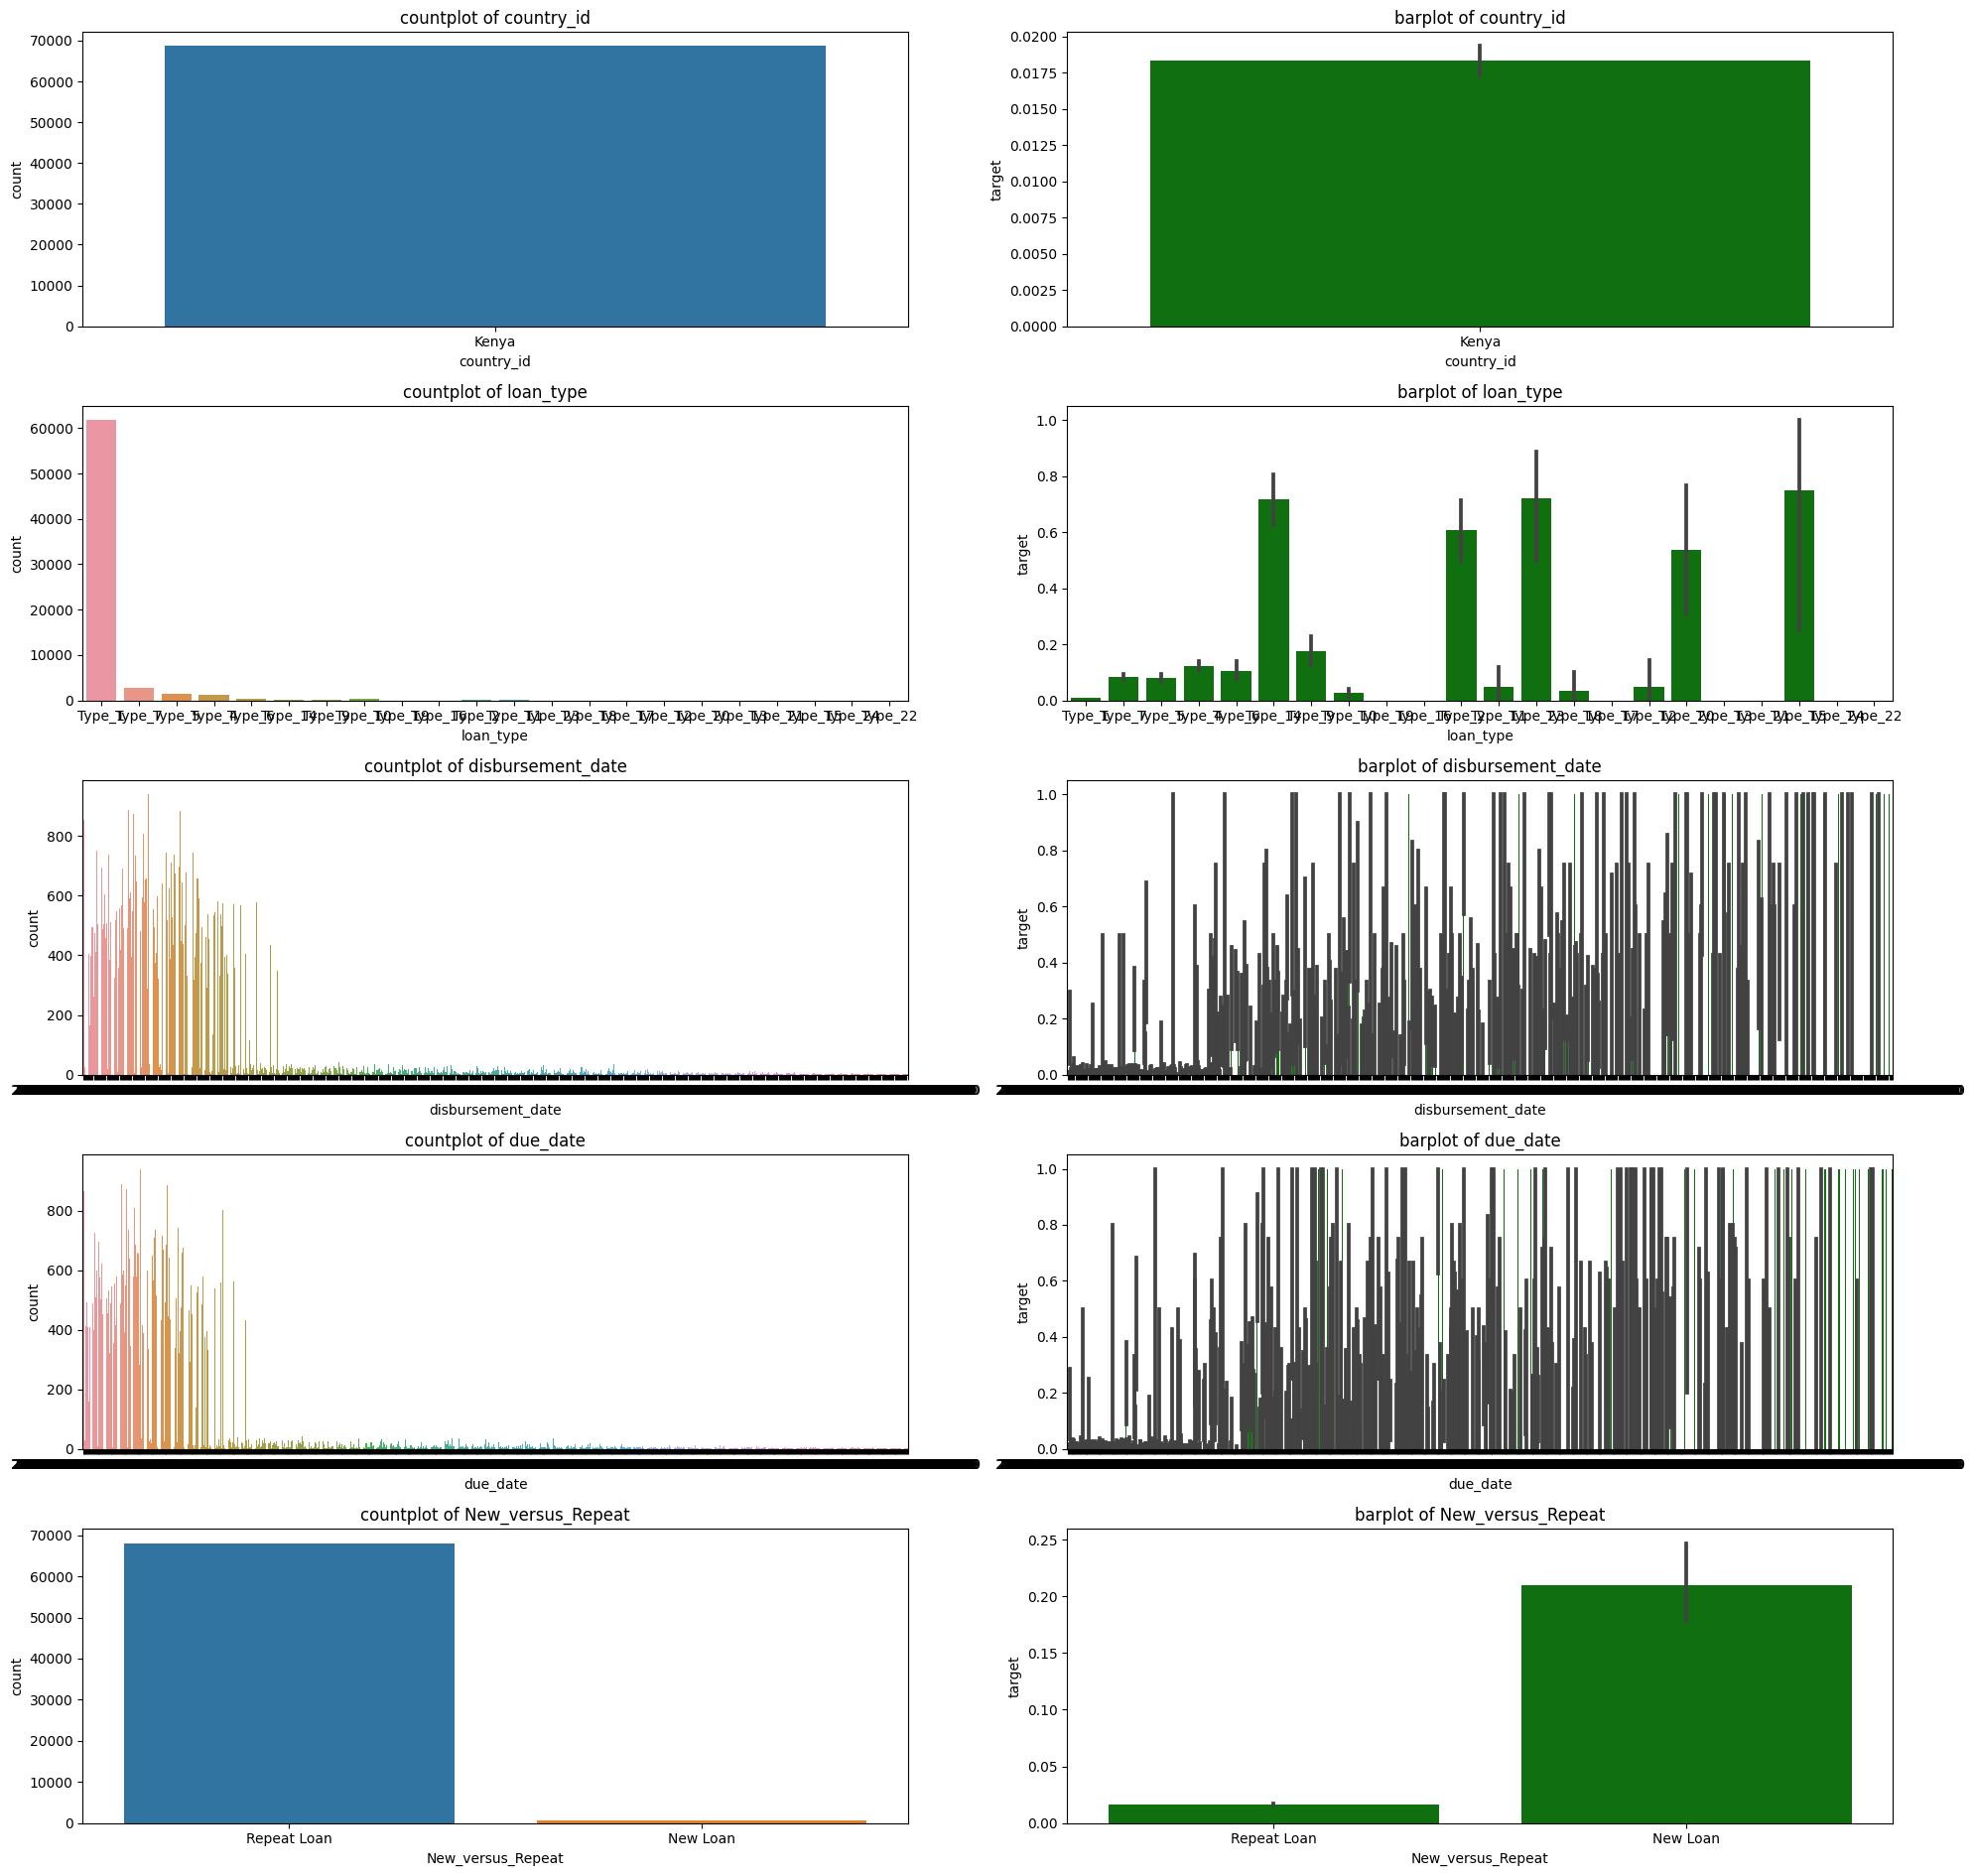

In [63]:
fig,axes=plt.subplots(len(cat_var),2,figsize=(20,19))
for i, var in enumerate(cat_var) :
    sns.countplot(data=train_data,x=var,ax=axes[i,0])
    sns.barplot(data=train_data,x=var,y='target',color='g',ax=axes[i,1], estimator='mean')
    axes[i,0].set_title(f'countplot of {var}')
    axes[i,1].set_title(f'barplot of {var}')

plt.tight_layout()
plt.show()

In [64]:
train_data.columns

Index(['customer_id', 'country_id', 'lender_id', 'loan_type', 'Total_Amount',
       'Total_Amount_to_Repay', 'disbursement_date', 'due_date', 'duration',
       'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target', 'month_due', 'year_due',
       'date_due', 'month_intial', 'year_intial', 'date_intial'],
      dtype='object')

In [65]:
new_var=['month_due', 'year_due','month_intial','year_intial','due_date','disbursement_date']

****Not Finding what I want because of poor scaling****

In [ ]:
fig,axes=plt.subplots(len(new_var),2,figsize=(20,19))
for i,var in enumerate(new_var):
    axes[i,0].scatter(train_data[var],train_data['Total_Amount'],color='r')
    axes[i,1].scatter(train_data[var],train_data['Amount_Funded_By_Lender'],color='g')
    axes[i,0].set_ylabel(f'Amount Received')
    axes[i,0].set_xlabel(f'{var}')
    axes[i,1].set_ylabel(f'Amount Given')
    axes[i,1].set_xlabel(f'{var}')
plt.tight_layout()
plt.show()

****Checking Outliers****

In [66]:
cont_values=['Lender_portion_to_be_repaid','Lender_portion_Funded','Amount_Funded_By_Lender','Total_Amount_to_Repay','Total_Amount']

# **Feature Enginering/Data Cleaning**

**Combining Information from the two dataset(extra_data and Train_data)**

In [67]:
df.reset_index(inplace=True)

In [68]:
df

,index,Indicator,YR2021,YR2022,YR2023,YR2024,YR2025
0,2,"Inflation, consumer prices (annual %)",6.107936,7.659863,7.671396,7.671396,7.671396
1,5,"Official exchange rate (LCU per US$, period av...",109.637747,117.865989,139.846384,139.846384,139.846384
2,8,Real interest rate (%),7.427581,5.968447,6.546517,6.546517,6.546517
3,14,Deposit interest rate (%),6.686974,7.145176,9.167690,9.167690,9.167690
4,17,Lending interest rate (%),12.079998,12.335841,13.588502,13.588502,13.588502
5,20,Interest rate spread (lending rate minus depos...,5.393025,5.190665,4.420812,4.420812,4.420812
6,26,Unemployment rate,5.693000,5.805000,5.682000,5.682000,5.682000


In [69]:
df.drop(columns=['index'],inplace=True)
df

/tmp/ipykernel_753/3979977388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'],inplace=True)


,Indicator,YR2021,YR2022,YR2023,YR2024,YR2025
0,"Inflation, consumer prices (annual %)",6.107936,7.659863,7.671396,7.671396,7.671396
1,"Official exchange rate (LCU per US$, period av...",109.637747,117.865989,139.846384,139.846384,139.846384
2,Real interest rate (%),7.427581,5.968447,6.546517,6.546517,6.546517
3,Deposit interest rate (%),6.686974,7.145176,9.167690,9.167690,9.167690
4,Lending interest rate (%),12.079998,12.335841,13.588502,13.588502,13.588502
5,Interest rate spread (lending rate minus depos...,5.393025,5.190665,4.420812,4.420812,4.420812
6,Unemployment rate,5.693000,5.805000,5.682000,5.682000,5.682000


In [70]:
train_data[train_data['year_due']==train_data['year_intial']].shape

(68323, 20)

In [71]:
train_data[train_data['month_due']<train_data['month_intial']].shape

(312, 20)

In [72]:
gdp_to_pop_kenya=my_extra_info_df['kenya']

In [73]:
data_kenya = {'Inflation, consumer prices (annual %)': [6.1079367, 7.659863, 7.671396, 7.671396, 7.671396],
        'Official exchange rate': [109.637747, 117.865989, 139.846384, 139.846384, 139.846384],
        'Real interest rate (%)': [7.427581, 5.968447, 6.546517, 6.546517, 6.546517],
        'Deposit interest rate (%)': [6.686974, 7.145176, 9.167690, 9.167690, 9.167690],
        'Lending interest rate (%)': [12.079998, 12.335841, 13.588502, 13.588502, 13.588502],
        'Interest rate spread': [5.393025, 5.190665, 4.420812, 4.420812, 4.420812],
        'Unemployment rate': [5.693000, 5.805000, 5.682000, 5.682000, 5.682000],
        'GDP_to_POP':[69.505, 69.506, 69.593,69.593, 69.593]    }

In [74]:
def combine(df,data,key,index,col):
    year_to_index_map = {
        2021: 0,
        2022: 1,
        2023: 2,
        2024: 3,
        2025: 4
    }
    
    year = df[col][index]
    index = year_to_index_map.get(year, None)  
    
    if index is not None:
        return data[key][index]

In [75]:
train_data['Inflation, consumer prices (annual %)']=[combine(train_data,data_kenya,'Inflation, consumer prices (annual %)',i,'year_intial') for i in range(0,train_data.shape[0])]
train_data['Official exchange rate']=[combine(train_data,data_kenya,'Official exchange rate',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['Real interest rate (%)']=[combine(train_data,data_kenya,'Real interest rate (%)',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['Deposit interest rate (%)']=[combine(train_data,data_kenya,'Deposit interest rate (%)',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['Lending interest rate (%)']=[combine(train_data,data_kenya,'Lending interest rate (%)',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['Interest rate spread']=[combine(train_data,data_kenya,'Interest rate spread',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['Unemployment rate']=[combine(train_data,data_kenya,'Unemployment rate',i,'year_intial') for i in range(0,train_data.shape[0])]
#train_data['GDP_to_POP']=[combine(train_data,data_kenya,'GDP_to_POP',i,'year_intial') for i in range(0,train_data.shape[0])]

In [76]:
train_data.duration.value_counts()[:10]

duration
7     64973
14     1567
30      958
90      249
60      201
45      118
31       77
29       61
25       34
92       31
Name: count, dtype: int64

In [77]:
train_data['duration_month']=train_data['month_due']-train_data['month_intial']
train_data['duration_month']

0        1
1        1
2        0
3        0
4        1
        ..
68649    1
68650    0
68651    0
68652    0
68653    1
Name: duration_month, Length: 68654, dtype: int32

In [78]:
train_data['Amount_toppings']=train_data['Total_Amount_to_Repay']-train_data['Total_Amount']
train_data['contribution']=train_data['Total_Amount']-train_data['Amount_Funded_By_Lender']
train_data['ratio_toppings']=train_data['Total_Amount']/train_data['Total_Amount_to_Repay']
train_data['ratio_contributions']=train_data['Amount_Funded_By_Lender']/train_data['Total_Amount']

In [79]:
train_data['Total_Amount**2']=train_data['Total_Amount']**2
train_data['Amount_toppings**2']=train_data['Amount_toppings']**2
train_data['Total_Amount_to_Repay**2']=train_data['Total_Amount_to_Repay']**2
train_data['contribution**2']=train_data['contribution']**2
train_data['Inflation, consumer prices (annual %)**3']=train_data['Inflation, consumer prices (annual %)']**2
#train_data['Deposit interest rate (%)**3']=train_data['Deposit interest rate (%)']**3
#train_data['Lending interest rate (%)**3']=train_data['Lending interest rate (%)']**3




In [80]:
cat_var,cont_var=seperate_features(train_data)

In [81]:
cont_var

['customer_id',
 'lender_id',
 'Total_Amount',
 'Total_Amount_to_Repay',
 'duration',
 'Amount_Funded_By_Lender',
 'Lender_portion_Funded',
 'Lender_portion_to_be_repaid',
 'target',
 'month_due',
 'year_due',
 'date_due',
 'month_intial',
 'year_intial',
 'date_intial',
 'Inflation, consumer prices (annual %)',
 'Official exchange rate',
 'duration_month',
 'Amount_toppings',
 'contribution',
 'ratio_toppings',
 'ratio_contributions',
 'Total_Amount**2',
 'Amount_toppings**2',
 'Total_Amount_to_Repay**2',
 'contribution**2',
 'Inflation, consumer prices (annual %)**3']

In [84]:
#train_data['GDP_to_POP']

In [85]:
cont_values=['contribution**2','contribution','Total_Amount_to_Repay**2','Amount_toppings**2','Total_Amount**2','ratio_contributions','ratio_toppings','Amount_toppings', 'Amount_Funded_By_Lender','Lender_portion_Funded','Lender_portion_to_be_repaid','Total_Amount','Total_Amount_to_Repay','GDP_to_POP','Inflation, consumer prices (annual %)','Official exchange rate']

In [86]:
for var in cont_values:
    if var not in train_data.columns:
        continue
    train_data[var] = np.sign(train_data[var]) * np.log(np.abs(train_data[var]) + 1)

In [87]:
train_data.head(10)

,customer_id,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,...,duration_month,Amount_toppings,contribution,ratio_toppings,ratio_contributions,Total_Amount**2,Amount_toppings**2,Total_Amount_to_Repay**2,contribution**2,"Inflation, consumer prices (annual %)**3"
0,266671,Kenya,267278,Type_1,9.041803,9.041803,2022-08-30,2022-09-06,7,Repeat Loan,...,1,0.000000,9.027397,0.693147,0.014204,18.083370,0.000000,18.083370,18.054553,58.673501
1,248919,Kenya,267278,Type_1,10.161844,10.165082,2022-07-30,2022-08-06,7,Repeat Loan,...,1,4.442651,9.805185,0.691529,0.262364,20.323610,8.861775,20.330088,19.610260,58.673501
2,308486,Kenya,251804,Type_7,8.839422,8.873888,2024-09-06,2024-09-13,7,Repeat Loan,...,0,5.493061,8.616314,0.676060,0.182322,17.678553,10.977893,17.747496,17.232266,58.850317
3,266004,Kenya,267278,Type_1,9.100414,9.130648,2022-10-20,2022-10-27,7,Repeat Loan,...,0,5.620401,8.743787,0.678143,0.262364,18.200605,11.233555,18.261079,17.487255,58.673501
4,253803,Kenya,267278,Type_1,8.426174,8.461469,2022-11-28,2022-12-05,7,Repeat Loan,...,1,5.105945,8.069593,0.675652,0.262364,16.851909,10.199770,16.922515,16.138560,58.673501
5,265607,Kenya,267278,Type_1,8.372399,8.372399,2022-10-19,2022-10-26,7,Repeat Loan,...,0,0.000000,8.015823,0.693147,0.262364,16.744335,0.000000,16.744335,16.030985,58.673501
6,261844,Kenya,267278,Type_1,8.815222,8.815222,2022-11-29,2022-12-06,7,Repeat Loan,...,1,0.000000,8.458610,0.693147,0.262364,17.630146,0.000000,17.630146,16.916796,58.673501
7,265488,Kenya,267278,Type_1,7.340187,7.354362,2022-10-25,2022-11-01,7,Repeat Loan,...,1,3.135494,6.983790,0.686080,0.262364,14.679076,6.184149,14.707445,13.965726,58.673501
8,268010,Kenya,267278,Type_1,9.975669,9.998570,2022-10-11,2022-10-18,7,Repeat Loan,...,0,6.212606,9.975669,0.681761,0.000000,19.951244,12.421204,19.997050,19.951244,58.673501
9,245399,Kenya,267278,Type_1,9.844427,9.844427,2022-08-15,2022-08-22,7,Repeat Loan,...,0,0.000000,9.487775,0.693147,0.262364,19.688749,0.000000,19.688749,18.975399,58.673501


**Checking for Outliers**

In [88]:
def removeoutliers(data,cont):
    q1=data[cont].quantile(0.25)
    q3=data[cont].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+3.5*IQR
    filtered_data=data[cont].where((data[cont]>lower_bound)&(data[cont]<upper_bound),other=np.nan)
    return filtered_data

In [ ]:
for i in cont_values:
    if i=='GDP_to_POP':
        continue
    train_data[i]=removeoutliers(train_data,i)

In [89]:
train_data.describe()

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,customer_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,...,duration_month,Amount_toppings,contribution,ratio_toppings,ratio_contributions,Total_Amount**2,Amount_toppings**2,Total_Amount_to_Repay**2,contribution**2,"Inflation, consumer prices (annual %)**3"
count,68654.000000,68654.000000,68654.000000,68654.000000,68654,68654,68654.000000,68654.000000,68654.000000,68654.000000,...,68654.000000,68654.000000,68654.000000,6.865400e+04,68654.000000,68654.000000,68654.000000,68654.000000,68654.000000,68654.000000
mean,254390.256780,266420.528462,8.575373,8.595405,2022-10-17 07:55:03.417135360,2022-10-25 20:59:15.638418944,8.544586,6.021324,0.191868,6.039280,...,0.232295,3.082031,8.298515,inf,0.191868,17.149835,6.151671,17.189926,16.596167,58.672206
min,145.000000,245684.000000,1.098612,0.000000,2021-10-04 00:00:00,2021-10-21 00:00:00,1.000000,0.000000,0.000000,0.000000,...,-11.000000,-10.725750,-5.937800,2.745735e-01,0.000000,1.609438,0.000000,0.000000,0.000000,37.306891
25%,248945.750000,267278.000000,7.738924,7.753624,2022-08-10 00:00:00,2022-08-17 00:00:00,7.000000,5.459586,0.112178,5.480639,...,0.000000,0.000000,7.441203,6.782816e-01,0.112178,15.476976,0.000000,15.506389,14.881233,58.673501
50%,255361.000000,267278.000000,8.565983,8.580356,2022-09-16 00:00:00,2022-09-23 00:00:00,7.000000,6.820016,0.262364,6.840547,...,0.000000,3.526361,8.299926,6.890935e-01,0.262364,17.131586,7.053586,17.160336,16.599355,58.673501
75%,262269.250000,267278.000000,9.345832,9.363147,2022-10-24 00:00:00,2022-10-31 00:00:00,7.000000,7.729142,0.262364,7.748460,...,1.000000,5.159055,9.113051,6.931472e-01,0.262364,18.691490,10.306617,18.726123,18.225881,58.673501
max,312737.000000,267278.000000,16.951005,17.050850,2024-11-14 00:00:00,2025-10-27 00:00:00,1096.000000,14.285515,0.773860,14.415083,...,8.000000,15.373432,16.950931,inf,0.773860,33.902010,30.746864,34.101700,33.901862,58.850317
std,26642.719918,3590.999004,1.263628,1.268962,NaN,NaN,13.343145,2.755193,0.109881,2.764522,...,0.821376,2.635792,1.353227,NaN,0.109881,2.528775,5.252546,2.539341,2.706223,0.511136


In [90]:
train_data.isna().sum()

customer_id                                 0
country_id                                  0
lender_id                                   0
loan_type                                   0
Total_Amount                                0
Total_Amount_to_Repay                       0
disbursement_date                           0
due_date                                    0
duration                                    0
New_versus_Repeat                           0
Amount_Funded_By_Lender                     0
Lender_portion_Funded                       0
Lender_portion_to_be_repaid                 0
target                                      0
month_due                                   0
year_due                                    0
date_due                                    0
month_intial                                0
year_intial                                 0
date_intial                                 0
Inflation, consumer prices (annual %)       0
Official exchange rate            

In [91]:
train_data.dropna(inplace=True)
train_data.shape

(68654, 32)

In [92]:
contains_inf = train_data.isin([np.inf, -np.inf]).any().any()

print("Contains np.inf or -np.inf:", contains_inf)

Contains np.inf or -np.inf: True


In [93]:
inf_count = train_data.isin([np.inf, -np.inf]).sum().sum()
print(f"Total number of np.inf and -np.inf: {inf_count}")

Total number of np.inf and -np.inf: 3


In [94]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.dropna(inplace=True)

In [95]:
train_data.isna().sum()

customer_id                                 0
country_id                                  0
lender_id                                   0
loan_type                                   0
Total_Amount                                0
Total_Amount_to_Repay                       0
disbursement_date                           0
due_date                                    0
duration                                    0
New_versus_Repeat                           0
Amount_Funded_By_Lender                     0
Lender_portion_Funded                       0
Lender_portion_to_be_repaid                 0
target                                      0
month_due                                   0
year_due                                    0
date_due                                    0
month_intial                                0
year_intial                                 0
date_intial                                 0
Inflation, consumer prices (annual %)       0
Official exchange rate            

In [96]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [97]:
def kmeans_featureGrouping(data,n_clusters,col,is_train=True,k_scaled=None,k_meansd=None):
    feature=data[col].values.reshape(-1,1)
    k_scale=RobustScaler()
    if is_train==True:
        feature=k_scale.fit_transform(feature)
        kmeans=KMeans(random_state=42,n_clusters=n_clusters)
        cluster=kmeans.fit_predict(feature)
        return cluster,k_scale,kmeans
    else:
        feature=k_scaled.transform(feature)
        cluster=k_meansd.predict(feature)
        
        return cluster

In [98]:
train_data.columns

Index(['customer_id', 'country_id', 'lender_id', 'loan_type', 'Total_Amount',
       'Total_Amount_to_Repay', 'disbursement_date', 'due_date', 'duration',
       'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target', 'month_due', 'year_due',
       'date_due', 'month_intial', 'year_intial', 'date_intial',
       'Inflation, consumer prices (annual %)', 'Official exchange rate',
       'duration_month', 'Amount_toppings', 'contribution', 'ratio_toppings',
       'ratio_contributions', 'Total_Amount**2', 'Amount_toppings**2',
       'Total_Amount_to_Repay**2', 'contribution**2',
       'Inflation, consumer prices (annual %)**3'],
      dtype='object')

In [99]:
# Assuming `train_data[col]` is the column being processed
feature = train_data['Amount_toppings'].values

# Check for invalid values
print("Contains NaN:", np.isnan(feature).any())
print("Contains Infinity:", np.isinf(feature).any())

Contains NaN: False
Contains Infinity: False


In [100]:
cluster_tot_amnt,scale_tot_amnt,kmeans_to_amnt=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Total_Amount',is_train=True)
cluster_amnt_to_repay,scale_amnt_to_repay,kmeans_amnt_to_repay=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Total_Amount_to_Repay',is_train=True)
cluster_amnt_tops,scale_amnt_tops,kmeans_amnt_tops=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Amount_toppings',is_train=True)
cluster_contri,scale_contri,kmeans_contri=kmeans_featureGrouping(data=train_data,n_clusters=3,col='contribution',is_train=True)
cluster_tot_amnt2,scale_tot_amt2,kmeans_tot_amnt2=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Total_Amount**2',is_train=True)
cluster_amnt_tops2,scale_amnt_tops2,kmeans_amnt_tops2=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Amount_toppings**2',is_train=True)
cluster_amnt_to_reapay2,scale_amnt_to_repay2,kmeans_amnt_to_repay2=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Total_Amount_to_Repay**2',is_train=True)
cluster_contri2,scale_contri2,kmeans_contri2=kmeans_featureGrouping(data=train_data,n_clusters=3,col='contribution**2',is_train=True)
cluster_amnt_lender,scale_amnt_lender,kmeans_amnt_lender=kmeans_featureGrouping(data=train_data,n_clusters=3,col='Amount_Funded_By_Lender',is_train=True)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [101]:
train_data['cluster_tot_amnt']=cluster_tot_amnt
train_data['cluster_amnt_to_repay']=cluster_amnt_to_repay
train_data['cluster_amnt_tops']=cluster_amnt_tops
train_data['cluster_contri']=cluster_contri
train_data['cluster_tot_amnt2']=cluster_tot_amnt2
train_data['cluster_amnt_tops2']=cluster_amnt_tops2
train_data['cluster_amnt_to_reapay2']=cluster_amnt_to_reapay2
train_data['cluster_contri2']=cluster_contri2
train_data['cluster_amnt_lender']=cluster_amnt_lender

****Interaction Effect****

In [102]:
train_data.columns

Index(['customer_id', 'country_id', 'lender_id', 'loan_type', 'Total_Amount',
       'Total_Amount_to_Repay', 'disbursement_date', 'due_date', 'duration',
       'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target', 'month_due', 'year_due',
       'date_due', 'month_intial', 'year_intial', 'date_intial',
       'Inflation, consumer prices (annual %)', 'Official exchange rate',
       'duration_month', 'Amount_toppings', 'contribution', 'ratio_toppings',
       'ratio_contributions', 'Total_Amount**2', 'Amount_toppings**2',
       'Total_Amount_to_Repay**2', 'contribution**2',
       'Inflation, consumer prices (annual %)**3', 'cluster_tot_amnt',
       'cluster_amnt_to_repay', 'cluster_amnt_tops', 'cluster_contri',
       'cluster_tot_amnt2', 'cluster_amnt_tops2', 'cluster_amnt_to_reapay2',
       'cluster_contri2', 'cluster_amnt_lender'],
      dtype='object')

In [105]:
#train_data['Unemployment rate']

In [106]:
#train_data['Amount_Funded_By_Lender*duration']=train_data['Amount_Funded_By_Lender']*train_data['duration']
#train_data['Total_Amount*Unemployment rate']=train_data['Total_Amount']*train_data['Unemployment rate']
train_data['Official exchange rate*Total_Amount']=train_data['Official exchange rate']*train_data['Total_Amount']
#train_data['Lending interest rate*Amount_Funded_By_Lender']=train_data['Amount_Funded_By_Lender']*train_data['Lending interest rate (%)']
train_data['Official exchange rate*Total_Amount_to_Repay']=train_data['Official exchange rate']*train_data['Total_Amount_to_Repay']
train_data['Inflation, consumer prices*Total_Amount']=train_data['Inflation, consumer prices (annual %)']*train_data['Total_Amount']
train_data['Inflation, consumer prices*Amount_Funded_By_Lender']=train_data['Inflation, consumer prices (annual %)']*train_data['Amount_Funded_By_Lender']
train_data['Inflation, consumer prices*contributions']=train_data['Inflation, consumer prices (annual %)']*train_data['contribution']
#train_data['Total_Amount_to_Repay*Unemployment rate']=train_data['Unemployment rate']*train_data['Total_Amount_to_Repay']
#train_data['Real interest rate*Amount_Funded_By_Lender']=train_data['Amount_Funded_By_Lender']*train_data['Real interest rate (%)']
#train_data['Deposit interest rate*Total_Amount']=train_data['Total_Amount']*train_data['Deposit interest rate (%)']
#train_data['Deposit interest rate*Amount_Funded_By_Lender']=train_data['Deposit interest rate (%)']*train_data['Amount_Funded_By_Lender']
#train_data['Deposit Rate*Lending Rate']=train_data['Deposit interest rate (%)']*train_data['Lending interest rate (%)']
#train_data['Lending interest rate * Deposit Rate']=train_data['Lending interest rate (%)']*train_data['Deposit interest rate (%)']


In [107]:
train_data.shape

(68651, 46)

In [108]:
train_data.isna().sum()

customer_id                                           0
country_id                                            0
lender_id                                             0
loan_type                                             0
Total_Amount                                          0
Total_Amount_to_Repay                                 0
disbursement_date                                     0
due_date                                              0
duration                                              0
New_versus_Repeat                                     0
Amount_Funded_By_Lender                               0
Lender_portion_Funded                                 0
Lender_portion_to_be_repaid                           0
target                                                0
month_due                                             0
year_due                                              0
date_due                                              0
month_intial                                    

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
lender_id_encoder= OneHotEncoder(handle_unknown='ignore', sparse=False) 

In [112]:
encoded_id=lender_id_encoder.fit_transform(train_data[['lender_id']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
encoded_df = pd.DataFrame(encoded_id, columns=lender_id_encoder.get_feature_names_out(['lender_id']))

In [114]:
encoded_df 

,lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
68646,0.0,0.0,0.0,1.0
68647,0.0,0.0,0.0,1.0
68648,0.0,0.0,0.0,1.0
68649,0.0,0.0,0.0,1.0


In [115]:
encoded_df.reset_index(drop=True, inplace=True)

In [116]:
encoded_df

,lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
68646,0.0,0.0,0.0,1.0
68647,0.0,0.0,0.0,1.0
68648,0.0,0.0,0.0,1.0
68649,0.0,0.0,0.0,1.0


In [117]:
train_data.reset_index(drop=True, inplace=True)

In [118]:
train_data

,customer_id,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,...,cluster_tot_amnt2,cluster_amnt_tops2,cluster_amnt_to_reapay2,cluster_contri2,cluster_amnt_lender,Official exchange rate*Total_Amount,Official exchange rate*Total_Amount_to_Repay,"Inflation, consumer prices*Total_Amount","Inflation, consumer prices*Amount_Funded_By_Lender","Inflation, consumer prices*contributions"
0,266671,Kenya,267278,Type_1,9.041803,9.041803,2022-08-30,2022-09-06,7,Repeat Loan,...,0,1,1,0,2,43.201707,43.201707,19.518531,10.367779,19.487431
1,248919,Kenya,267278,Type_1,10.161844,10.165082,2022-07-30,2022-08-06,7,Repeat Loan,...,2,2,2,2,0,48.553256,48.568730,21.936361,19.337541,21.166443
2,308486,Kenya,251804,Type_7,8.839422,8.873888,2024-09-06,2024-09-13,7,Repeat Loan,...,0,0,1,0,0,43.734540,43.905069,19.093414,15.618232,18.611496
3,266004,Kenya,267278,Type_1,9.100414,9.130648,2022-10-20,2022-10-27,7,Repeat Loan,...,0,0,1,0,0,43.481748,43.626204,19.645053,17.046601,18.875203
4,253803,Kenya,267278,Type_1,8.426174,8.461469,2022-11-28,2022-12-05,7,Repeat Loan,...,0,0,1,0,0,40.260231,40.428871,18.189572,15.591660,17.419821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68646,244559,Kenya,267278,Type_1,7.286876,7.323831,2022-07-30,2022-08-06,7,Repeat Loan,...,1,2,0,1,2,34.816672,34.993238,15.730172,13.134602,14.960851
68647,260062,Kenya,267278,Type_1,8.523175,8.540324,2022-07-16,2022-07-23,7,Repeat Loan,...,0,2,1,0,0,40.723703,40.805638,18.398969,15.800955,17.629199
68648,259137,Kenya,267278,Type_1,8.573574,8.573574,2022-07-15,2022-07-22,7,Repeat Loan,...,0,1,1,0,0,40.964506,40.964506,18.507764,15.909701,17.737985
68649,266801,Kenya,267278,Type_1,8.112228,8.112228,2022-11-23,2022-11-30,7,Repeat Loan,...,0,1,1,0,2,38.760199,38.760199,17.511858,14.267857,16.969363


In [119]:
train_data.isna().sum()

customer_id                                           0
country_id                                            0
lender_id                                             0
loan_type                                             0
Total_Amount                                          0
Total_Amount_to_Repay                                 0
disbursement_date                                     0
due_date                                              0
duration                                              0
New_versus_Repeat                                     0
Amount_Funded_By_Lender                               0
Lender_portion_Funded                                 0
Lender_portion_to_be_repaid                           0
target                                                0
month_due                                             0
year_due                                              0
date_due                                              0
month_intial                                    

In [120]:
train_data2=train_data.copy(deep=True)

In [121]:
train_data2=pd.concat([train_data2, encoded_df], axis=1)

In [122]:
train_data2.shape

(68651, 50)

In [123]:
train_data2.isna().sum()

customer_id                                           0
country_id                                            0
lender_id                                             0
loan_type                                             0
Total_Amount                                          0
Total_Amount_to_Repay                                 0
disbursement_date                                     0
due_date                                              0
duration                                              0
New_versus_Repeat                                     0
Amount_Funded_By_Lender                               0
Lender_portion_Funded                                 0
Lender_portion_to_be_repaid                           0
target                                                0
month_due                                             0
year_due                                              0
date_due                                              0
month_intial                                    

In [124]:
train_data2.drop(columns=['lender_id'],inplace=True)

In [125]:
train_data2.drop(columns=['customer_id','due_date','disbursement_date'],inplace=True)

In [126]:
year_encoders={}
for i in ['year_due','year_intial']:
    year_encoder=LabelEncoder()
    train_data2[i]=year_encoder.fit_transform(train_data2[i])
    year_encoders[i]=year_encoder
year_encoders  

{'year_due': LabelEncoder(), 'year_intial': LabelEncoder()}

In [127]:
loan_type_encoder=LabelEncoder()
train_data2['loan_type']=loan_type_encoder.fit_transform(train_data2['loan_type'])

In [128]:
train_data2[['country_id','loan_type']]

,country_id,loan_type
0,Kenya,0
1,Kenya,0
2,Kenya,20
3,Kenya,0
4,Kenya,0
...,...,...
68646,Kenya,0
68647,Kenya,0
68648,Kenya,0
68649,Kenya,0


In [129]:
train_data2['country_id'].replace({'Kenya':1},inplace=True)

/tmp/ipykernel_753/967549950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data2['country_id'].replace({'Kenya':1},inplace=True)
/tmp/ipykernel_753/967549950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data2['country_id'].replace({'Kenya':1},inplace=True)


In [130]:
train_data2['New_versus_Repeat'].value_counts()[:10]

New_versus_Repeat
Repeat Loan    68084
New Loan         567
Name: count, dtype: int64

In [131]:
repeat_encoder=LabelEncoder()
train_data2['New_versus_Repeat']=repeat_encoder.fit_transform(train_data2['New_versus_Repeat'])

In [132]:
train_data2['Inflation*year_intial']=train_data2['Inflation, consumer prices (annual %)']*train_data2['year_intial']
train_data2['Inflation*year_due']=train_data2['Inflation, consumer prices (annual %)']*train_data2['year_due']
train_data2['officalExchangeRate*year_intial']=train_data2['Official exchange rate']*train_data2['year_intial']
train_data2['officalExchangeRate*year_due']=train_data2['Official exchange rate']*train_data2['year_due']

<Axes: >

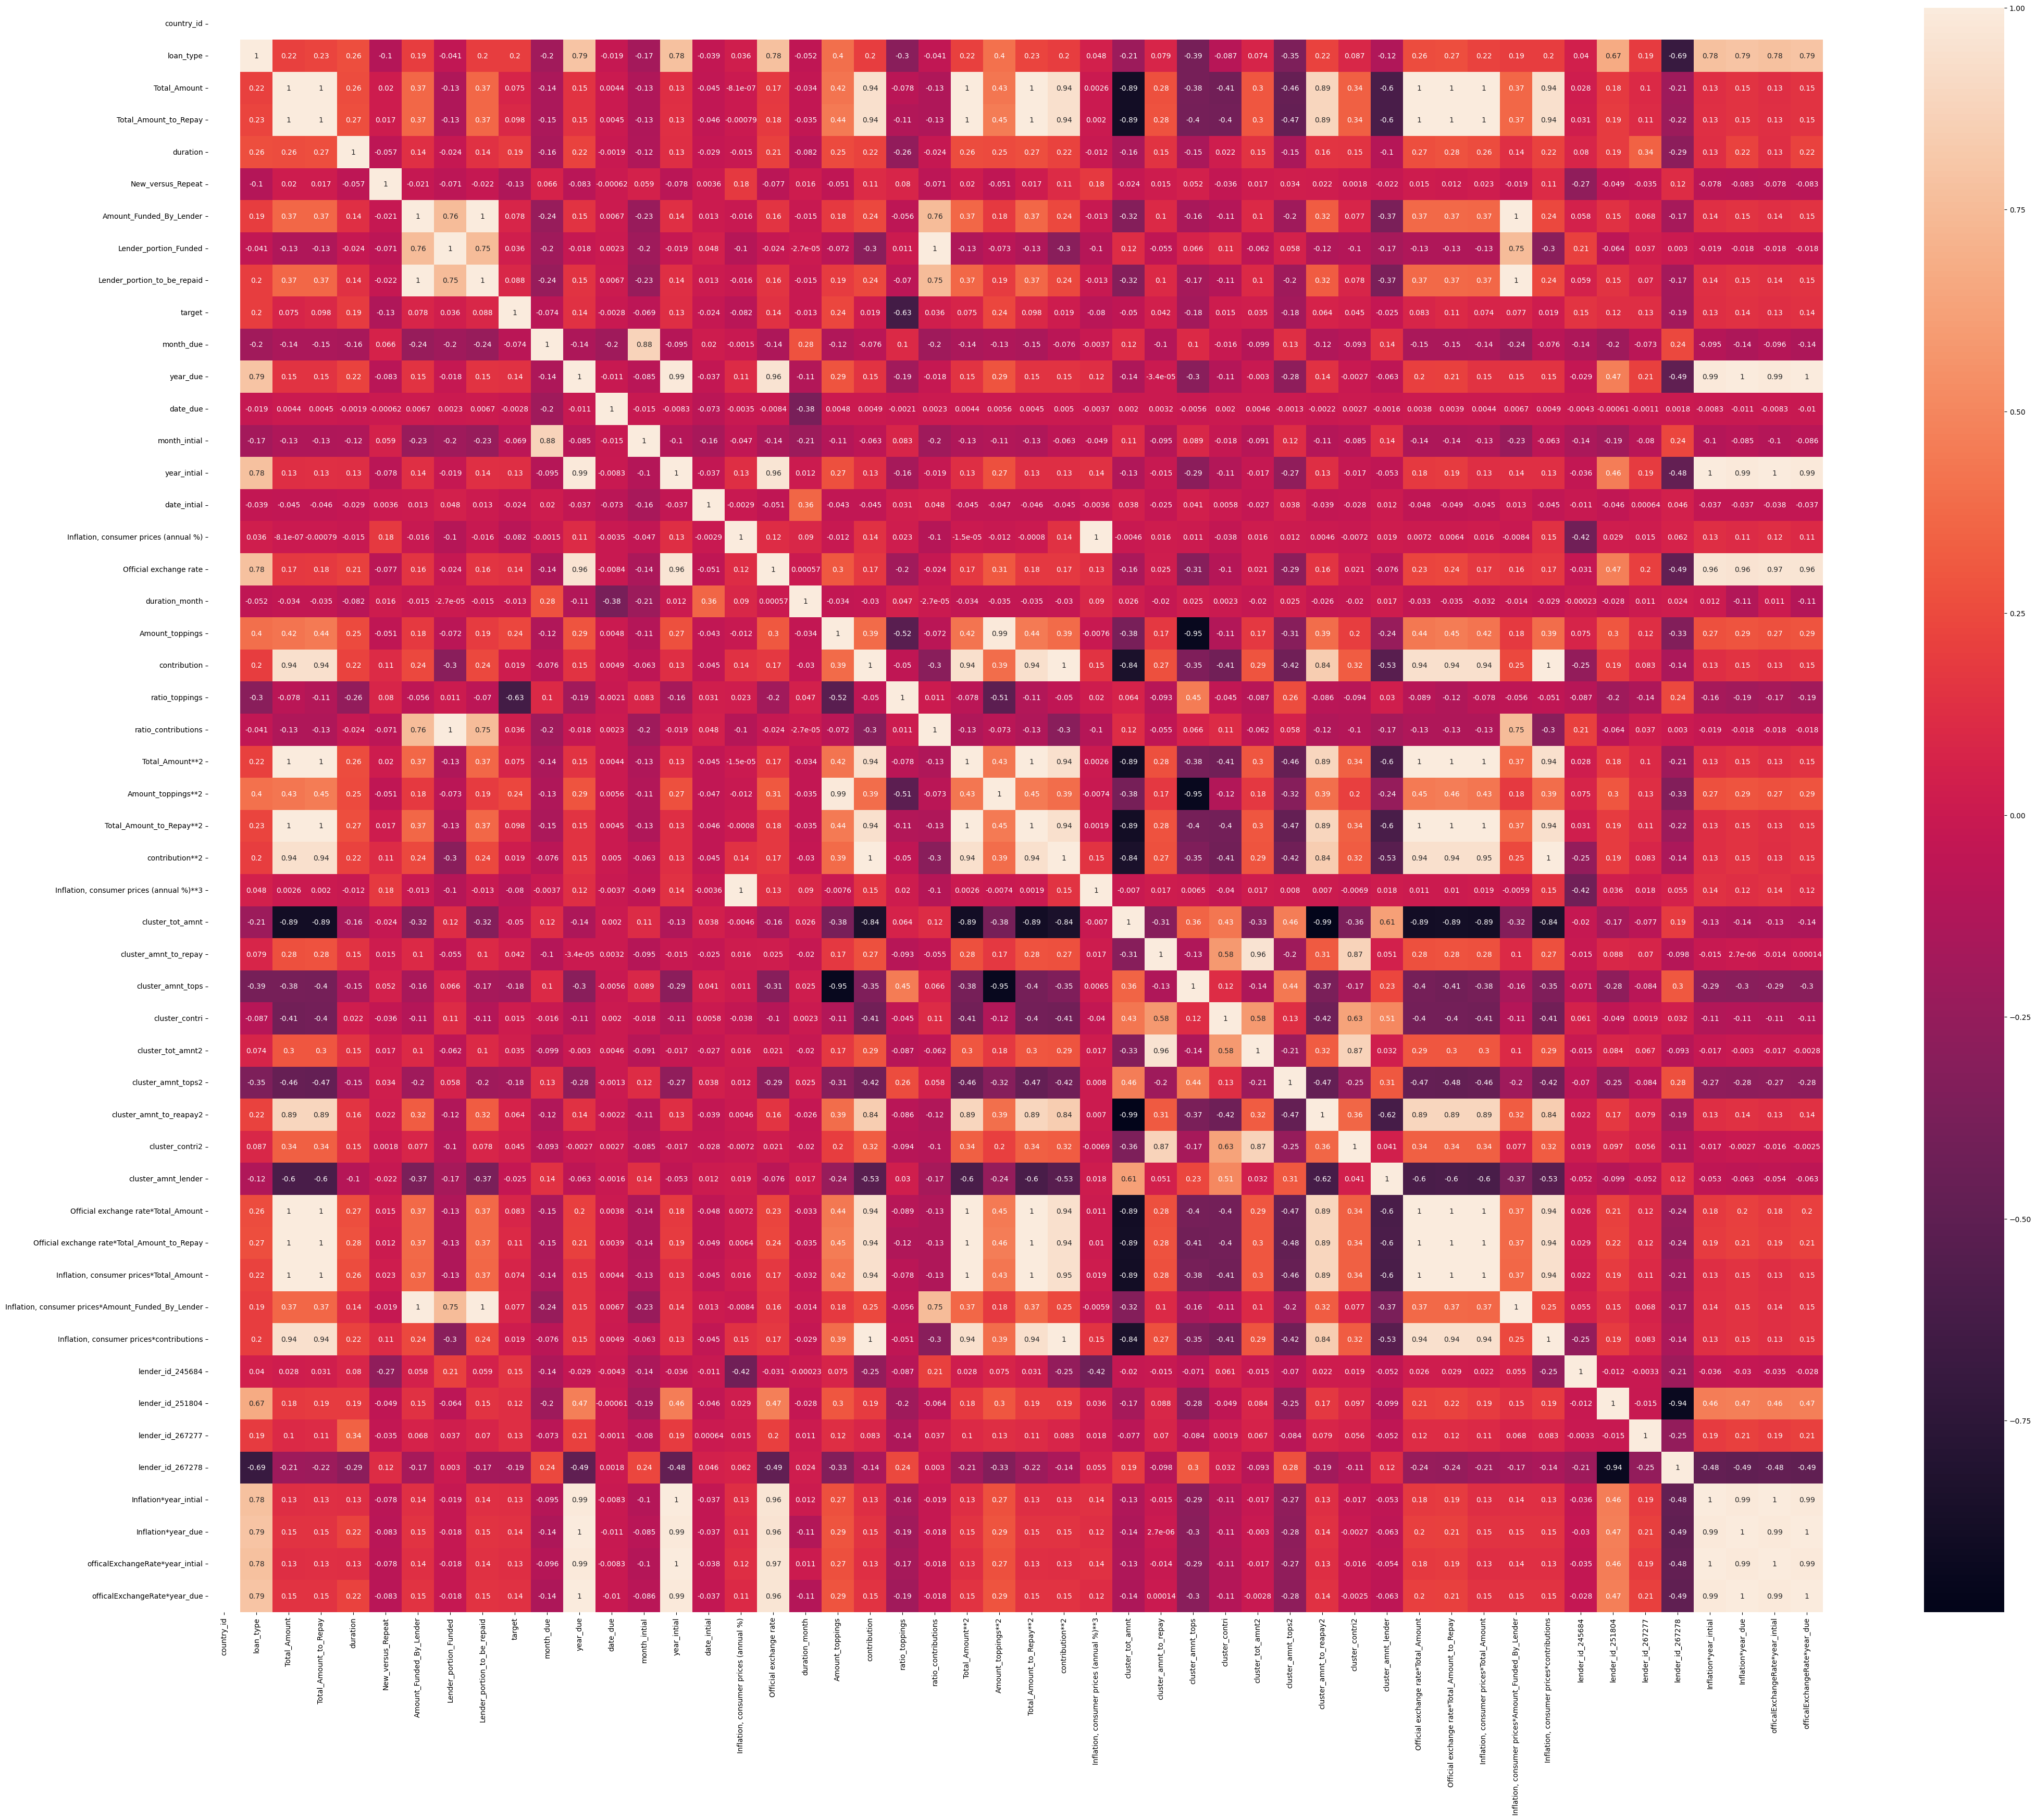

In [133]:
plt.figure(figsize=(50,40))
matrices=train_data2.corr()
sns.heatmap(matrices,annot=True)

In [134]:
train_data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68651 entries, 0 to 68650
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_id                                          68651 non-null  int64  
 1   loan_type                                           68651 non-null  int64  
 2   Total_Amount                                        68651 non-null  float64
 3   Total_Amount_to_Repay                               68651 non-null  float64
 4   duration                                            68651 non-null  int64  
 5   New_versus_Repeat                                   68651 non-null  int64  
 6   Amount_Funded_By_Lender                             68651 non-null  float64
 7   Lender_portion_Funded                               68651 non-null  float64
 8   Lender_portion_to_be_repaid                         68651 non-null  float64


In [135]:
for i in train_data2.columns:
    if train_data2[i].dtype=='int64':    
        train_data2[i]=train_data2[i].astype('int32')

In [136]:
for i in train_data2.columns:
    if train_data2[i].dtype=='float64':    
        train_data2[i]=train_data2[i].astype('float32')

In [137]:
y_values=train_data2.pop('target')

In [138]:
#train_data2.drop(columns=['Deposit Rate*Lending Rate'],inplace=True)

In [139]:
x_train=train_data2.copy(deep=True)

In [140]:
from sklearn.ensemble import IsolationForest

In [141]:
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(x_train) 
x_train['anomaly_scores'] = isolation_forest.decision_function(x_train)
x_train.head(30)

,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,month_due,...,"Inflation, consumer prices*contributions",lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278,Inflation*year_intial,Inflation*year_due,officalExchangeRate*year_intial,officalExchangeRate*year_due,anomaly_scores
0,1,0,9.041803,9.041803,7,1,4.802791,0.014204,4.804021,9,...,19.487431,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.038826
1,1,0,10.161844,10.165082,7,1,8.957961,0.262364,8.961238,8,...,21.166443,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.015407
2,1,20,8.839421,8.873888,7,1,7.230563,0.182322,7.264730,9,...,18.611496,0.0,1.0,0.0,0.0,6.480089,6.480089,14.843009,14.843009,-0.082666
3,1,0,9.100414,9.130648,7,1,7.896701,0.262364,7.926963,10,...,18.875202,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.099523
4,1,0,8.426174,8.461469,7,1,7.222712,0.262364,7.257708,12,...,17.419821,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.077969
5,1,0,8.372398,8.372398,7,1,7.168965,0.262364,7.169350,10,...,17.303747,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.101119
6,1,0,8.815222,8.815222,7,1,7.611595,0.262364,7.611843,12,...,18.259592,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.083280
7,1,0,7.340187,7.354362,7,1,6.137727,0.262364,6.152733,11,...,15.075900,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.066488
8,1,0,9.975669,9.998570,7,1,0.000000,0.000000,0.000000,10,...,21.534466,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.020947
9,1,0,9.844427,9.844427,7,1,8.640578,0.262364,8.640649,8,...,20.481249,0.0,0.0,0.0,1.0,2.158699,2.158699,4.777997,4.777997,0.055125


In [142]:
anamly=x_train.pop('anomaly_scores')

In [143]:
cat_var,cont_var=seperate_features(x_train)

In [144]:
len(cont_var)

49

In [145]:
categorical_columns = [
    'country_id', 'loan_type', 'New_versus_Repeat', 'month_due', 'year_due', 
    'date_due', 'month_intial', 'year_intial', 'date_intial', 
    'lender_id_245684', 'lender_id_251804', 'lender_id_267277', 'lender_id_267278',
    'cluster_tot_amnt', 'cluster_amnt_to_repay', 'cluster_amnt_tops', 'cluster_contri', 
    'cluster_tot_amnt2', 'cluster_amnt_tops2', 'cluster_amnt_to_reapay2', 'cluster_contri2', 
    'cluster_amnt_lender'
]

In [146]:
filtered_columns = [col for col in cont_var if col not in categorical_columns]

In [147]:
filtered_columns

['Total_Amount',
 'Total_Amount_to_Repay',
 'duration',
 'Amount_Funded_By_Lender',
 'Lender_portion_Funded',
 'Lender_portion_to_be_repaid',
 'Inflation, consumer prices (annual %)',
 'Official exchange rate',
 'duration_month',
 'Amount_toppings',
 'contribution',
 'ratio_toppings',
 'ratio_contributions',
 'Total_Amount**2',
 'Amount_toppings**2',
 'Total_Amount_to_Repay**2',
 'contribution**2',
 'Inflation, consumer prices (annual %)**3',
 'Official exchange rate*Total_Amount',
 'Official exchange rate*Total_Amount_to_Repay',
 'Inflation, consumer prices*Total_Amount',
 'Inflation, consumer prices*Amount_Funded_By_Lender',
 'Inflation, consumer prices*contributions',
 'Inflation*year_intial',
 'Inflation*year_due',
 'officalExchangeRate*year_intial',
 'officalExchangeRate*year_due']

In [ ]:
#filtered_columns.remove('anomaly_scores')

In [148]:
x_train.shape

(68651, 49)

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
max_min_scaler=MinMaxScaler()

In [151]:
x_train[filtered_columns] = max_min_scaler.fit_transform(x_train[filtered_columns])
x_train.head(30)

,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,month_due,...,"Inflation, consumer prices*Amount_Funded_By_Lender","Inflation, consumer prices*contributions",lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278,Inflation*year_intial,Inflation*year_due,officalExchangeRate*year_intial,officalExchangeRate*year_due
0,1,0,0.501072,0.488715,0.005479,1,0.336200,0.018354,0.333263,9,...,0.335993,0.653824,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
1,1,0,0.571726,0.560424,0.005479,1,0.627066,0.339033,0.621657,8,...,0.626680,0.687805,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
2,1,20,0.488305,0.477996,0.005479,1,0.506146,0.235600,0.503967,9,...,0.506146,0.636096,0.0,1.0,0.0,0.0,1.000000,0.750000,1.000000,0.750000
3,1,0,0.504769,0.494387,0.005479,1,0.552777,0.339033,0.549908,10,...,0.552436,0.641433,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
4,1,0,0.462237,0.451668,0.005479,1,0.505597,0.339033,0.503480,12,...,0.505285,0.611978,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
5,1,0,0.458845,0.445982,0.005479,1,0.501835,0.339033,0.497351,10,...,0.501525,0.609628,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
6,1,0,0.486779,0.474251,0.005479,1,0.532819,0.339033,0.528047,12,...,0.532491,0.628974,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
7,1,0,0.393731,0.380992,0.005479,1,0.429647,0.339033,0.426826,11,...,0.429382,0.564539,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
8,1,0,0.559982,0.549794,0.005479,1,0.000000,0.000000,0.000000,10,...,0.000000,0.695253,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427
9,1,0,0.551703,0.539954,0.005479,1,0.604849,0.339033,0.599417,8,...,0.604476,0.673938,0.0,0.0,0.0,1.0,0.333128,0.249846,0.321902,0.241427


In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_values,test_size=0.3,random_state=42,shuffle=True)

In [156]:
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import StratifiedKFold

In [157]:
mcc=make_scorer(matthews_corrcoef)

In [158]:
print(x_train.shape)
print(x_cv.shape)

(48055, 49)
(20596, 49)


In [159]:

def objective(trial):
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'tree_method': trial.suggest_categorical('tree_method', ['hist']),
        'device': trial.suggest_categorical('device', ['cuda']),
        'device':trial.suggest_categorical('device',['cuda']),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1,log=True),
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'max_depth': trial.suggest_int('max_depth', 6, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'scale_pos_weight':trial.suggest_float('scale_pos_weight',1,5),}
    
    model=XGBClassifier(**params)
    sfk=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score =cross_val_score(model,x_train,y_train,cv=sfk,scoring='average_precision')
    score=np.mean(score)
    return score

In [160]:
from xgboost import XGBClassifier

In [161]:
import optuna

In [162]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

[I 2024-12-18 08:31:57,280] A new study created in memory with name: no-name-d7b17533-5f0b-403d-b958-915dae360ee2
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:31:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2024-12-18 08:32:05,309] Trial 0 finished with value: 0.9239832394887701 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'device': 'cuda', 'learning_rate': 0.0011116308749271337, 'n_estimators': 446, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8585247989966178, 'colsample_bytree': 0.8846408883839727, 's

KeyboardInterrupt: 

In [163]:
xgb_param=study.best_params
print(xgb_param)

{'booster': 'dart', 'tree_method': 'hist', 'device': 'cuda', 'learning_rate': 0.042115179525176634, 'n_estimators': 465, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.7497241371620319, 'colsample_bytree': 0.7535555750634887, 'scale_pos_weight': 3.630507562279572}


In [ ]:
xgb_param1={'booster': 'dart', 'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.03215215757099627, 'n_estimators': 454, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.9546596092081069, 'colsample_bytree': 0.9348283069473015, 'scale_pos_weight': 4.124076712688115}
xgb_param2={'booster': 'gbtree', 'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.03810951002260542, 'n_estimators': 203, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8533875339614254, 'colsample_bytree': 0.6137283627629055, 'scale_pos_weight': 4.3580480881640415}

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
xgb_model=XGBClassifier(**xgb_param)
xgb_model.fit(x_train,y_train)
y_predict=xgb_model.predict(x_cv)
accuracy=accuracy_score(y_cv,y_predict)
print(accuracy)

0.9949019227034376


In [168]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


Text(0, 0.5, 'recall')

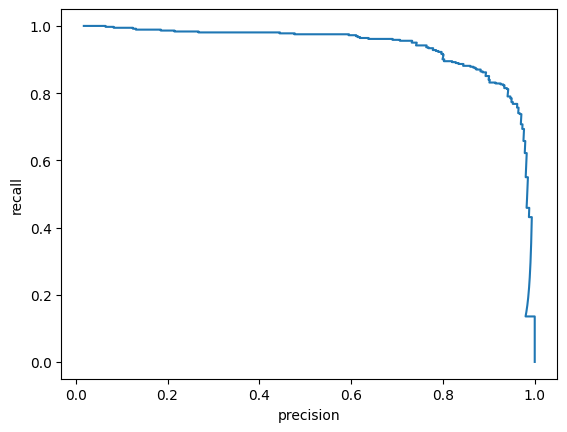

In [169]:
precision,recall,threshold=precision_recall_curve(y_cv,xgb_model.predict_proba(x_cv)[:,1])
plt.plot(precision,recall)
plt.xlabel('precision')
plt.ylabel('recall')

In [170]:
y_cv.value_counts()

target
0    20234
1      362
Name: count, dtype: int64

In [171]:
y_failed_zero=np.sum(y_predict[(y_cv==0)]==0)
print(y_failed_zero)

20170


In [172]:
y_failed_zero=np.sum(y_predict[(y_cv==1)]==1)
print(y_failed_zero)

321


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_cv,y_predict))

In [ ]:
auc=average_precision_score(y_cv,xgb_model.predict_proba(x_cv)[:,1])
print(auc)

<Axes: xlabel='importance', ylabel='feature'>

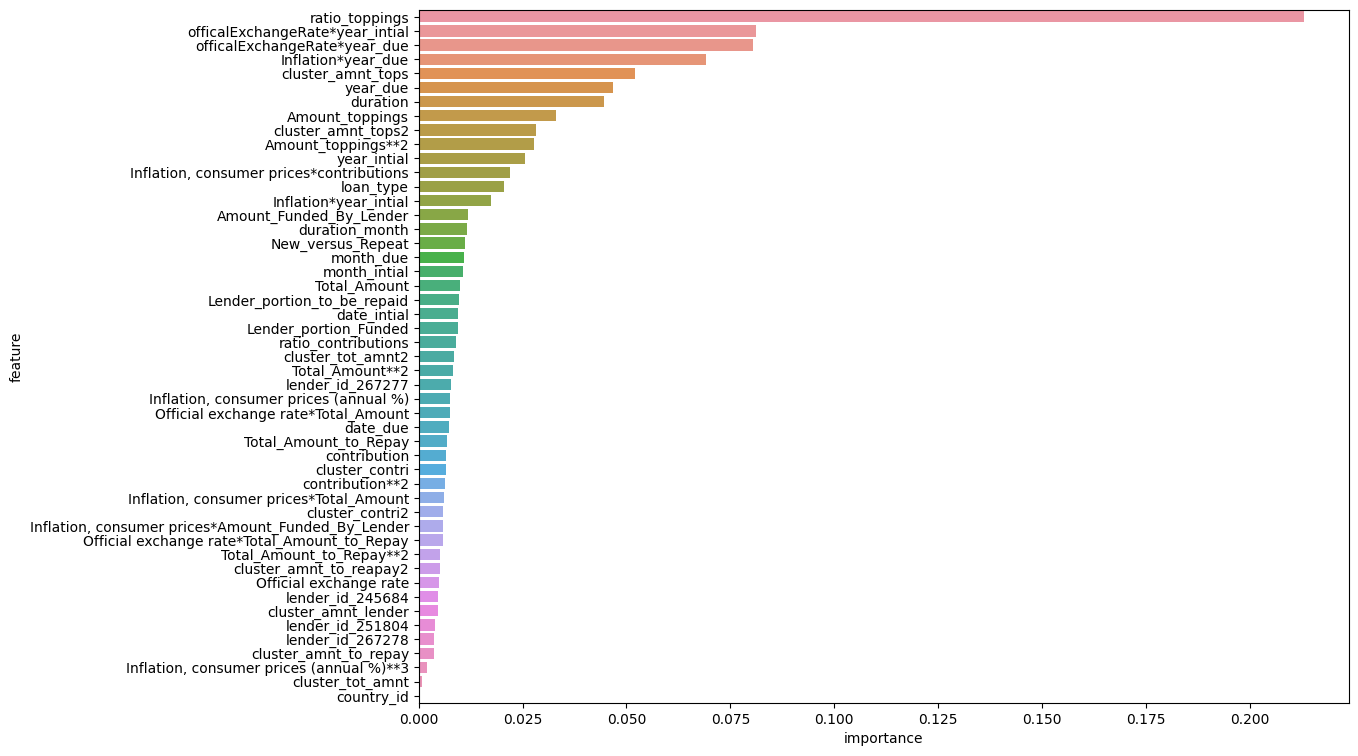

In [193]:
feature_name=xgb_model.feature_names_in_
feature_importance=xgb_model.feature_importances_
x_gbplot=pd.DataFrame({
    'feature':feature_name,
    'importance':feature_importance
})
x_gbplot=x_gbplot.sort_values(by='importance',ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x=x_gbplot['importance'],y=x_gbplot['feature'],data=x_gbplot)

# **Test_Data**

In [226]:
sample_data=pd.read_csv(sample_path)
sample_data

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0
...,...,...
18589,ID_297596365331297183,0
18590,ID_259715231897267278,0
18591,ID_296701364008297183,0
18592,ID_268271242864267278,0


In [227]:
test_data=pd.read_csv(test_path)
test_data

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [228]:
ID=test_data.pop('ID')

In [229]:
test_data.drop(columns=['customer_id','tbl_loan_id'],inplace=True)

In [230]:
test_data.country_id.replace({'Kenya':1,'Ghana':0},inplace=True)
test_data.head(4)

/tmp/ipykernel_753/2734100662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data.country_id.replace({'Kenya':1,'Ghana':0},inplace=True)
/tmp/ipykernel_753/2734100662.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.country_id.replace({'Kenya':1,'Ghana':0},inplace=True)


,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,1,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,1,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,1,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,1,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0


In [231]:
test_data.head(20)

,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,1,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,1,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,1,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,1,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,1,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
5,1,267278,Type_1,3438.00,3471.00,2022-11-05,2022-11-12,7,Repeat Loan,1031.40,0.300000,1041.00
6,1,267278,Type_7,5000.00,5181.00,2024-07-17,2024-07-24,7,Repeat Loan,1000.00,0.200000,1036.00
7,1,267278,Type_1,3917.00,3917.00,2022-10-10,2022-10-17,7,Repeat Loan,117.00,0.029870,117.00
8,1,267278,Type_1,4799.00,4799.00,2022-08-31,2022-09-07,7,Repeat Loan,0.00,0.000000,0.00
9,1,267278,Type_1,5708.00,5885.00,2022-08-27,2022-09-03,7,Repeat Loan,120.00,0.021023,124.00


In [232]:
year_encoders

{'year_due': LabelEncoder(), 'year_intial': LabelEncoder()}

In [233]:
test_data['due_date']=pd.to_datetime(test_data['due_date'])
test_data['disbursement_date']=pd.to_datetime(test_data['disbursement_date'])

In [234]:
test_data['month_due']=test_data['due_date'].dt.month
test_data['year_due']=test_data['due_date'].dt.year
test_data['date_due']=test_data['due_date'].dt.day

test_data['month_intial']=test_data['disbursement_date'].dt.month
test_data['year_intial']=test_data['disbursement_date'].dt.year
test_data['date_intial']=test_data['disbursement_date'].dt.day


In [235]:
maxium = test_data['disbursement_date'].dt.year.max()
minium=test_data['disbursement_date'].dt.year.min()
maxium1 = test_data['due_date'].dt.year.max()
minium1=test_data['due_date'].dt.year.min()
print(maxium,minium)
print(maxium1,minium1)

2024 2021
2025 2021


In [204]:
#ghana_real_interest_rate=ghana_real_interest_rate.tolist()

In [205]:
#ghana_intreset_spread=ghana_intreset_spread.tolist()

In [236]:
data_ghana={
    'Inflation, consumer prices (annual %)':[9.971089, 31.255895, 38.106966,41.917663,46.109429],
    'Official exchange rate': [5.595708, 5.805700, 8.272400,11.020408],
    'Real interest rate (%)':[3.983911, 9.535065, 14.386136, 16.196832, 18.388599],
    'Deposit interest rate (%)':[11.500000, 12.052083, 11.416667,12.558334,13.814167],
    'Lending interest rate (%)': [20.60833, 26.22833, 28.851163, 31.736279, 34.909907],
    'Interest rate spread':[9.108329, 14.176247, 17.434496, 19.177945, 21.09574],
     'Unemployment rate':[3.285000, 3.338000, 3.084000, 3.079000],
     'GDP_to_POP':[65.842, 66.495, 66.372, 66.372, 66.372]
}

In [237]:
def combine_test(df,data_k,data_g,key,index,col,country_id):
    year_to_index_map = {
        2021: 0,
        2022: 1,
        2023: 2,
        2024: 3,
        2025: 4
    }
    
    year = df[col][index]
    country=df[country_id][index]
    index = year_to_index_map.get(year, None)  
    
    if index is not None:
        if country==0:
            return data_g[key][index]
        elif country==1:
            return data_k[key][index]


In [238]:
test_data['Inflation, consumer prices (annual %)']=[combine_test(test_data,data_kenya,data_ghana,'Inflation, consumer prices (annual %)',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
test_data['Official exchange rate']=[combine_test(test_data,data_kenya,data_ghana,'Official exchange rate',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['Real interest rate (%)']=[combine_test(test_data,data_kenya,data_ghana,'Real interest rate (%)',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['Deposit interest rate (%)']=[combine_test(test_data,data_kenya,data_ghana,'Deposit interest rate (%)',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['Lending interest rate (%)']=[combine_test(test_data,data_kenya,data_ghana,'Lending interest rate (%)',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['Interest rate spread']=[combine_test(test_data,data_kenya,data_ghana,'Interest rate spread',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['Unemployment rate']=[combine_test(test_data,data_kenya,data_ghana,'Unemployment rate',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]
#test_data['GDP_to_POP']=[combine_test(test_data,data_kenya,data_ghana,'GDP_to_POP',i,'year_intial','country_id') for i in range(0,test_data.shape[0])]

In [239]:
test_data['Inflation, consumer prices (annual %)']

0         7.659863
1         7.659863
2         7.659863
3         7.659863
4         7.659863
           ...    
18589    38.106966
18590     7.659863
18591    31.255895
18592     7.659863
18593     7.659863
Name: Inflation, consumer prices (annual %), Length: 18594, dtype: float64

In [240]:
test_data['duration_month']=test_data['month_due']-test_data['month_intial']
test_data['duration_month']

0        1
1        0
2        0
3        0
4        0
        ..
18589    0
18590    0
18591    0
18592    0
18593    0
Name: duration_month, Length: 18594, dtype: int32

In [241]:
test_data['Amount_toppings']=test_data['Total_Amount_to_Repay']-test_data['Total_Amount']
test_data['contribution']=test_data['Total_Amount']-test_data['Amount_Funded_By_Lender']
test_data['ratio_toppings']=test_data['Total_Amount']/test_data['Total_Amount_to_Repay']
test_data['ratio_contributions']=test_data['Amount_Funded_By_Lender']/test_data['Total_Amount']


In [242]:
test_data['Total_Amount**2']=test_data['Total_Amount']**2
test_data['Amount_toppings**2']=test_data['Amount_toppings']**2
test_data['Total_Amount_to_Repay**2']=test_data['Total_Amount_to_Repay']**2
test_data['contribution**2']=test_data['contribution']**2
test_data['Inflation, consumer prices (annual %)**3']=test_data['Inflation, consumer prices (annual %)']**3
#test_data['Deposit interest rate (%)**3']=test_data['Deposit interest rate (%)']**3
#test_data['Lending interest rate (%)**3']=test_data['Lending interest rate (%)']**3


In [243]:
cont_values=['contribution**2','contribution','Total_Amount_to_Repay**2','Amount_toppings**2','Total_Amount**2','ratio_contributions','ratio_toppings','Amount_toppings', 'Amount_Funded_By_Lender','Lender_portion_Funded','Lender_portion_to_be_repaid','Total_Amount','Total_Amount_to_Repay','GDP_to_POP']

In [244]:
for var in cont_values:
    if var not in test_data.columns:
        continue
    test_data[var] = np.sign(test_data[var]) * np.log(np.abs(test_data[var]) + 1)

In [245]:
inf_count = test_data.isin([np.inf, -np.inf]).sum().sum()
print(f"Total number of np.inf and -np.inf: {inf_count}")

Total number of np.inf and -np.inf: 1


In [246]:
test_data.replace([np.inf, -np.inf], -1.00, inplace=True)

In [247]:
contains_inf = test_data.isin([np.inf, -np.inf]).any().any()

print("Contains np.inf or -np.inf:", contains_inf)


Contains np.inf or -np.inf: False


In [248]:
cluster_tot_amnt_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Total_Amount',is_train=False,k_scaled=scale_tot_amnt,k_meansd=kmeans_to_amnt)
cluster_amnt_to_repay_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Total_Amount_to_Repay',is_train=False,k_scaled=scale_amnt_to_repay,k_meansd=kmeans_amnt_to_repay)
cluster_amnt_tops_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Amount_toppings',is_train=False,k_scaled=scale_amnt_tops,k_meansd=kmeans_amnt_tops)
cluster_contri_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='contribution',is_train=False,k_scaled=scale_contri,k_meansd=kmeans_contri)
cluster_tot_amnt2_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Total_Amount**2',is_train=False,k_scaled=scale_tot_amt2,k_meansd=kmeans_tot_amnt2)
cluster_amnt_tops2_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Amount_toppings**2',is_train=False,k_scaled=scale_amnt_tops2,k_meansd=kmeans_amnt_tops2)
cluster_amnt_to_reapay2_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Total_Amount_to_Repay**2',is_train=False,k_scaled=scale_amnt_to_repay2,k_meansd=kmeans_amnt_to_repay2)
cluster_contri2_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='contribution**2',is_train=False,k_scaled=scale_contri2,k_meansd=kmeans_contri2)
cluster_amnt_lender_s=kmeans_featureGrouping(data=test_data,n_clusters=3,col='Amount_Funded_By_Lender',is_train=False,k_scaled=scale_amnt_lender,k_meansd=kmeans_amnt_lender)

In [249]:
test_data['cluster_tot_amnt']=cluster_tot_amnt_s
test_data['cluster_amnt_to_repay']=cluster_amnt_to_repay_s
test_data['cluster_amnt_tops']=cluster_amnt_tops_s
test_data['cluster_contri']=cluster_contri_s
test_data['cluster_tot_amnt2']=cluster_tot_amnt2_s
test_data['cluster_amnt_tops2']=cluster_amnt_tops2_s
test_data['cluster_amnt_to_reapay2']=cluster_amnt_to_reapay2_s
test_data['cluster_contri2']=cluster_contri2_s
test_data['cluster_amnt_lender']=cluster_amnt_lender_s

In [250]:
#train_data['Amount_Funded_By_Lender*duration']=train_data['Amount_Funded_By_Lender']*train_data['duration']
#train_data['Total_Amount*Unemployment rate']=train_data['Total_Amount']*train_data['Unemployment rate']
test_data['Official exchange rate*Total_Amount']=test_data['Official exchange rate']*test_data['Total_Amount']
#train_data['Lending interest rate*Amount_Funded_By_Lender']=train_data['Amount_Funded_By_Lender']*train_data['Lending interest rate (%)']
test_data['Official exchange rate*Total_Amount_to_Repay']=test_data['Official exchange rate']*test_data['Total_Amount_to_Repay']
test_data['Inflation, consumer prices*Total_Amount']=test_data['Inflation, consumer prices (annual %)']*test_data['Total_Amount']
test_data['Inflation, consumer prices*Amount_Funded_By_Lender']=test_data['Inflation, consumer prices (annual %)']*test_data['Amount_Funded_By_Lender']
test_data['Inflation, consumer prices*contributions']=test_data['Inflation, consumer prices (annual %)']*test_data['contribution']
#train_data['Total_Amount_to_Repay*Unemployment rate']=train_data['Unemployment rate']*train_data['Total_Amount_to_Repay']
#train_data['Real interest rate*Amount_Funded_By_Lender']=train_data['Amount_Funded_By_Lender']*train_data['Real interest rate (%)']
#train_data['Deposit interest rate*Total_Amount']=train_data['Total_Amount']*train_data['Deposit interest rate (%)']
#train_data['Deposit interest rate*Amount_Funded_By_Lender']=train_data['Deposit interest rate (%)']*train_data['Amount_Funded_By_Lender']
#train_data['Deposit Rate*Lending Rate']=train_data['Deposit interest rate (%)']*train_data['Lending interest rate (%)']
#train_data['Lending interest rate * Deposit Rate']=train_data['Lending interest rate (%)']*train_data['Deposit interest rate (%)']


In [251]:
encoded_id_test=lender_id_encoder.transform(test_data[['lender_id']])
encoded_id_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [252]:
encoded_df_test = pd.DataFrame(encoded_id_test, columns=lender_id_encoder.get_feature_names_out(['lender_id']))

In [253]:
encoded_df_test

,lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
18589,0.0,0.0,0.0,0.0
18590,0.0,0.0,0.0,1.0
18591,0.0,0.0,0.0,0.0
18592,0.0,0.0,0.0,1.0


In [254]:
test_data

,country_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,...,cluster_tot_amnt2,cluster_amnt_tops2,cluster_amnt_to_reapay2,cluster_contri2,cluster_amnt_lender,Official exchange rate*Total_Amount,Official exchange rate*Total_Amount_to_Repay,"Inflation, consumer prices*Total_Amount","Inflation, consumer prices*Amount_Funded_By_Lender","Inflation, consumer prices*contributions"
0,1,267278,Type_1,7.560080,7.595890,2022-07-27,2022-08-03,7,Repeat Loan,6.357322,...,1,2,0,1,2,891.076361,895.297077,57.909181,48.696217,55.178809
1,1,267278,Type_1,7.668094,7.675082,2022-11-16,2022-11-23,7,Repeat Loan,0.000000,...,1,2,0,0,1,903.807449,904.631114,58.736547,0.000000,58.736547
2,1,267278,Type_1,9.018574,9.024613,2022-08-24,2022-08-31,7,Repeat Loan,5.337538,...,0,2,1,0,2,1062.983186,1063.694939,69.081044,40.884810,68.886518
3,1,267278,Type_1,8.125631,8.125631,2022-11-15,2022-11-22,7,Repeat Loan,6.922348,...,0,1,1,0,2,957.735533,957.735533,62.241220,53.024239,59.510110
4,1,267278,Type_1,4.795791,4.795791,2022-11-10,2022-11-17,7,Repeat Loan,3.610918,...,1,1,0,1,2,565.260596,565.260596,36.735099,27.659137,34.030100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,0,297183,Type_3,7.456691,7.486232,2023-02-09,2023-02-16,7,Repeat Loan,5.599939,...,1,2,0,1,2,61.684734,61.929106,284.151885,213.396697,277.706826
18590,1,267278,Type_1,7.336286,7.336286,2022-08-04,2022-08-11,7,Repeat Loan,6.133832,...,1,1,0,1,2,864.698565,864.698565,56.194943,46.984311,53.465000
18591,0,297183,Type_3,7.224906,7.254390,2022-06-23,2022-06-30,7,Repeat Loan,5.191122,...,1,2,0,1,2,41.945639,42.116812,225.820914,162.253159,221.464158
18592,1,267278,Type_1,8.632128,8.662505,2022-08-23,2022-08-30,7,Repeat Loan,0.000000,...,0,0,1,0,1,1017.434272,1021.014710,66.120916,0.000000,66.120916


In [255]:
encoded_df_test.reset_index(drop=True, inplace=True)

In [256]:
test_data=pd.concat([test_data, encoded_df_test], axis=1)

In [257]:
test_data.isna().sum()

country_id                                            0
lender_id                                             0
loan_type                                             0
Total_Amount                                          0
Total_Amount_to_Repay                                 0
disbursement_date                                     0
due_date                                              0
duration                                              0
New_versus_Repeat                                     0
Amount_Funded_By_Lender                               0
Lender_portion_Funded                                 0
Lender_portion_to_be_repaid                           0
month_due                                             0
year_due                                              0
date_due                                              0
month_intial                                          0
year_intial                                           0
date_intial                                     

In [258]:
test_data.drop(columns=['lender_id'],inplace=True)

In [259]:
test_data.drop(columns=['due_date','disbursement_date'],inplace=True)

In [260]:
classes=loan_type_encoder.classes_

In [261]:
class_mapping = {class_name: idx for idx, class_name in enumerate(classes)}
print("Classes:", classes)
print("Class Mapping:", class_mapping)

Classes: ['Type_1' 'Type_10' 'Type_11' 'Type_12' 'Type_13' 'Type_14' 'Type_15'
 'Type_16' 'Type_17' 'Type_18' 'Type_19' 'Type_2' 'Type_20' 'Type_21'
 'Type_22' 'Type_23' 'Type_24' 'Type_4' 'Type_5' 'Type_6' 'Type_7'
 'Type_9']
Class Mapping: {'Type_1': 0, 'Type_10': 1, 'Type_11': 2, 'Type_12': 3, 'Type_13': 4, 'Type_14': 5, 'Type_15': 6, 'Type_16': 7, 'Type_17': 8, 'Type_18': 9, 'Type_19': 10, 'Type_2': 11, 'Type_20': 12, 'Type_21': 13, 'Type_22': 14, 'Type_23': 15, 'Type_24': 16, 'Type_4': 17, 'Type_5': 18, 'Type_6': 19, 'Type_7': 20, 'Type_9': 21}


In [262]:
test_data['loan_type']

0        Type_1
1        Type_1
2        Type_1
3        Type_1
4        Type_1
          ...  
18589    Type_3
18590    Type_1
18591    Type_3
18592    Type_1
18593    Type_1
Name: loan_type, Length: 18594, dtype: object

In [263]:
test_data['loan_type'].replace({'Type_1': 0, 'Type_10': 1, 'Type_11': 2, 'Type_12': 3, 'Type_13': 4, 'Type_14': 5, 'Type_15': 6, 'Type_17': 8, 'Type_18': 9, 'Type_2': 11, 'Type_20': 12, 'Type_21': 13, 'Type_22': 14, 'Type_23': 15, 'Type_24': 16, 'Type_4': 17, 'Type_5': 18, 'Type_6': 19, 'Type_7': 20, 'Type_9': 21,'Type_3':22,'Type_8':23},inplace=True)

/tmp/ipykernel_753/1869255887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['loan_type'].replace({'Type_1': 0, 'Type_10': 1, 'Type_11': 2, 'Type_12': 3, 'Type_13': 4, 'Type_14': 5, 'Type_15': 6, 'Type_17': 8, 'Type_18': 9, 'Type_2': 11, 'Type_20': 12, 'Type_21': 13, 'Type_22': 14, 'Type_23': 15, 'Type_24': 16, 'Type_4': 17, 'Type_5': 18, 'Type_6': 19, 'Type_7': 20, 'Type_9': 21,'Type_3':22,'Type_8':23},inplace=True)


In [264]:
test_data['New_versus_Repeat']=repeat_encoder.transform(test_data['New_versus_Repeat'])

In [265]:
for i in ['year_due','year_intial']:
    test_data[i]=year_encoders[i].transform(test_data[i])

In [267]:
test_data['Inflation*year_intial']=test_data['Inflation, consumer prices (annual %)']*test_data['year_intial']
test_data['Inflation*year_due']=test_data['Inflation, consumer prices (annual %)']*test_data['year_due']
test_data['officalExchangeRate*year_intial']=test_data['Official exchange rate']*test_data['year_intial']
test_data['officalExchangeRate*year_due']=test_data['Official exchange rate']*test_data['year_due']


In [266]:
test_data.columns

Index(['country_id', 'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'month_due',
       'year_due', 'date_due', 'month_intial', 'year_intial', 'date_intial',
       'Inflation, consumer prices (annual %)', 'Official exchange rate',
       'duration_month', 'Amount_toppings', 'contribution', 'ratio_toppings',
       'ratio_contributions', 'Total_Amount**2', 'Amount_toppings**2',
       'Total_Amount_to_Repay**2', 'contribution**2',
       'Inflation, consumer prices (annual %)**3', 'cluster_tot_amnt',
       'cluster_amnt_to_repay', 'cluster_amnt_tops', 'cluster_contri',
       'cluster_tot_amnt2', 'cluster_amnt_tops2', 'cluster_amnt_to_reapay2',
       'cluster_contri2', 'cluster_amnt_lender',
       'Official exchange rate*Total_Amount',
       'Official exchange rate*Total_Amount_to_Repay',
       'Inflation, consumer prices*Total_Amount',
       'I

In [268]:
for i in test_data.columns:
    if test_data[i].dtype=='int64':    
        test_data[i]=test_data[i].astype('int32')

for i in test_data.columns:
    if test_data[i].dtype=='float64':    
        test_data[i]=test_data[i].astype('float32')



In [ ]:
#test_data.drop(columns=['Deposit Rate*Lending Rate'],inplace=True)

In [269]:
print(test_data.isna().sum())

country_id                                            0
loan_type                                             0
Total_Amount                                          0
Total_Amount_to_Repay                                 0
duration                                              0
New_versus_Repeat                                     0
Amount_Funded_By_Lender                               0
Lender_portion_Funded                                 0
Lender_portion_to_be_repaid                           0
month_due                                             0
year_due                                              0
date_due                                              0
month_intial                                          0
year_intial                                           0
date_intial                                           0
Inflation, consumer prices (annual %)                 0
Official exchange rate                                0
duration_month                                  

In [ ]:
test_data['anomaly_scores'] = isolation_forest.predict(test_data)
test_data.head(10)

In [270]:
test_data[filtered_columns] = max_min_scaler.transform(test_data[filtered_columns])
test_data.head(30)

,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,month_due,...,"Inflation, consumer prices*Amount_Funded_By_Lender","Inflation, consumer prices*contributions",lender_id_245684,lender_id_251804,lender_id_267277,lender_id_267278,Inflation*year_intial,Inflation*year_due,officalExchangeRate*year_intial,officalExchangeRate*year_due
0,1,0,0.407602,0.396411,0.005479,1,0.445019,0.339033,0.443535,8,...,1.578118,1.376177,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
1,1,0,0.414416,0.401466,0.005479,1,0.000000,0.000000,0.000000,11,...,0.000000,1.448181,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
2,1,0,0.499607,0.487618,0.005479,1,0.373633,0.032008,0.370607,8,...,1.324971,1.653605,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
3,1,0,0.443278,0.430228,0.005479,1,0.484571,0.339033,0.480236,11,...,1.718378,1.463837,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
4,1,0,0.233225,0.217657,0.005479,1,0.252768,0.339033,0.250496,11,...,0.896361,0.948151,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
5,1,0,0.444370,0.431943,0.005479,1,0.485782,0.339033,0.482057,11,...,1.722671,1.466520,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
6,1,20,0.467991,0.457508,0.005479,1,0.483620,0.235600,0.481724,7,...,1.717586,1.547196,0.0,0.0,0.0,1.0,3.551523,2.663642,28.265101,21.198825
7,1,0,0.452596,0.439658,0.005479,1,0.333953,0.038033,0.330951,10,...,1.184257,1.537310,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
8,1,0,0.465403,0.452619,0.005479,1,0.000000,0.000000,0.000000,9,...,0.000000,1.573486,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631
9,1,0,0.476344,0.465640,0.005479,1,0.335710,0.026885,0.334949,9,...,1.190490,1.597079,0.0,0.0,0.0,1.0,1.182061,0.886546,7.940842,5.955631


In [271]:
y_predict_proba=xgb_model.predict_proba(test_data)[:,1]

In [284]:
y_predict=(y_predict_proba>=0.6).astype('int')

In [ ]:
test_data.shape

In [ ]:
y_predict

In [285]:
y_predict.sum()

606

In [286]:
submit_df=pd.DataFrame({
    'ID':ID,
    'target':y_predict
})

In [287]:
submit_df.to_csv('my_submission.csv',index=False)

In [ ]:
year_encoders['year_due']